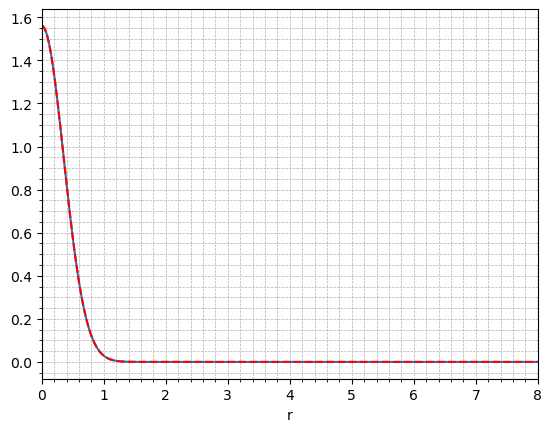

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 1                                              # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 0

sigma = 1/2

A0 = 0.78   # 0.77 -> disperses ; 0.7 -> colapse

Phi_0 = A0*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.show()




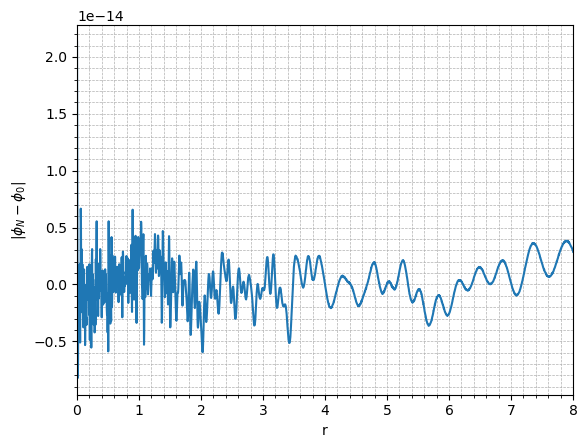

In [133]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid(which='both', linestyle='--', linewidth=0.5)  
plt.minorticks_on() 
plt.show()

In [134]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:
while n <= nf: 
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
#  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew
  n = n + 1

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


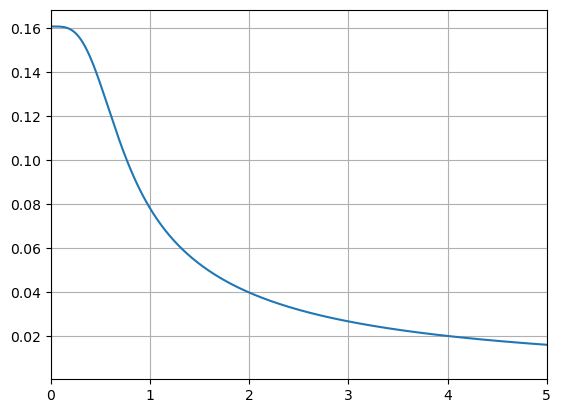

In [135]:
Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.grid()
plt.show()

In [136]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [137]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [138]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 6

#filter1 = np.ones(N+1)
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [139]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0
 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # L2-error associated to the momentum constraint
  rqKrr = np.dot(ck0, rqSB1)  
  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC 

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi_0)
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi_0)
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
    
#  if t > 9:
#    h=0.0001

  print(f't = {t}')
    
  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
#  print(f'a0_max = {max(a0)}, b0_max = {max(b0)}')

out_a.close()
out_p.close() 

t1 = np.linspace(0, tf, len(Alpha_origin)) 

t = 0.0002
t = 0.0004
t = 0.0006000000000000001
t = 0.0008
t = 0.001
t = 0.0012000000000000001
t = 0.0014000000000000002
t = 0.0016000000000000003
t = 0.0018000000000000004
t = 0.0020000000000000005
t = 0.0022000000000000006
t = 0.0024000000000000007
t = 0.0026000000000000007
t = 0.002800000000000001
t = 0.003000000000000001
t = 0.003200000000000001
t = 0.003400000000000001
t = 0.003600000000000001
t = 0.0038000000000000013
t = 0.004000000000000001
t = 0.004200000000000001
t = 0.0044
t = 0.0046
t = 0.0048
t = 0.004999999999999999
t = 0.005199999999999999
t = 0.0053999999999999986
t = 0.005599999999999998
t = 0.005799999999999998
t = 0.0059999999999999975
t = 0.006199999999999997
t = 0.006399999999999997
t = 0.0065999999999999965
t = 0.006799999999999996
t = 0.006999999999999996
t = 0.0071999999999999955
t = 0.007399999999999995
t = 0.007599999999999995
t = 0.0077999999999999944
t = 0.007999999999999995
t = 0.008199999999999995
t = 0.008399999999999996
t = 0.008599999999999997
t = 0.008

t = 0.06919999999999993
t = 0.06939999999999993
t = 0.06959999999999994
t = 0.06979999999999995
t = 0.06999999999999995
t = 0.07019999999999996
t = 0.07039999999999996
t = 0.07059999999999997
t = 0.07079999999999997
t = 0.07099999999999998
t = 0.07119999999999999
t = 0.07139999999999999
t = 0.0716
t = 0.0718
t = 0.07200000000000001
t = 0.07220000000000001
t = 0.07240000000000002
t = 0.07260000000000003
t = 0.07280000000000003
t = 0.07300000000000004
t = 0.07320000000000004
t = 0.07340000000000005
t = 0.07360000000000005
t = 0.07380000000000006
t = 0.07400000000000007
t = 0.07420000000000007
t = 0.07440000000000008
t = 0.07460000000000008
t = 0.07480000000000009
t = 0.0750000000000001
t = 0.0752000000000001
t = 0.0754000000000001
t = 0.07560000000000011
t = 0.07580000000000012
t = 0.07600000000000012
t = 0.07620000000000013
t = 0.07640000000000013
t = 0.07660000000000014
t = 0.07680000000000015
t = 0.07700000000000015
t = 0.07720000000000016
t = 0.07740000000000016
t = 0.077600000000000

t = 0.1384000000000019
t = 0.13860000000000192
t = 0.13880000000000192
t = 0.13900000000000193
t = 0.13920000000000193
t = 0.13940000000000194
t = 0.13960000000000194
t = 0.13980000000000195
t = 0.14000000000000196
t = 0.14020000000000196
t = 0.14040000000000197
t = 0.14060000000000197
t = 0.14080000000000198
t = 0.14100000000000198
t = 0.141200000000002
t = 0.141400000000002
t = 0.141600000000002
t = 0.141800000000002
t = 0.142000000000002
t = 0.14220000000000202
t = 0.14240000000000202
t = 0.14260000000000203
t = 0.14280000000000204
t = 0.14300000000000204
t = 0.14320000000000205
t = 0.14340000000000205
t = 0.14360000000000206
t = 0.14380000000000207
t = 0.14400000000000207
t = 0.14420000000000208
t = 0.14440000000000208
t = 0.1446000000000021
t = 0.1448000000000021
t = 0.1450000000000021
t = 0.1452000000000021
t = 0.1454000000000021
t = 0.14560000000000212
t = 0.14580000000000212
t = 0.14600000000000213
t = 0.14620000000000213
t = 0.14640000000000214
t = 0.14660000000000215
t = 0.14

t = 0.2076000000000039
t = 0.2078000000000039
t = 0.2080000000000039
t = 0.2082000000000039
t = 0.20840000000000392
t = 0.20860000000000392
t = 0.20880000000000393
t = 0.20900000000000393
t = 0.20920000000000394
t = 0.20940000000000394
t = 0.20960000000000395
t = 0.20980000000000396
t = 0.21000000000000396
t = 0.21020000000000397
t = 0.21040000000000397
t = 0.21060000000000398
t = 0.21080000000000398
t = 0.211000000000004
t = 0.211200000000004
t = 0.211400000000004
t = 0.211600000000004
t = 0.211800000000004
t = 0.21200000000000402
t = 0.21220000000000402
t = 0.21240000000000403
t = 0.21260000000000404
t = 0.21280000000000404
t = 0.21300000000000405
t = 0.21320000000000405
t = 0.21340000000000406
t = 0.21360000000000406
t = 0.21380000000000407
t = 0.21400000000000408
t = 0.21420000000000408
t = 0.2144000000000041
t = 0.2146000000000041
t = 0.2148000000000041
t = 0.2150000000000041
t = 0.2152000000000041
t = 0.21540000000000412
t = 0.21560000000000412
t = 0.21580000000000413
t = 0.21600

t = 0.2774000000000021
t = 0.27760000000000207
t = 0.27780000000000205
t = 0.278000000000002
t = 0.278200000000002
t = 0.278400000000002
t = 0.27860000000000196
t = 0.27880000000000194
t = 0.2790000000000019
t = 0.2792000000000019
t = 0.27940000000000187
t = 0.27960000000000185
t = 0.2798000000000018
t = 0.2800000000000018
t = 0.2802000000000018
t = 0.28040000000000176
t = 0.28060000000000174
t = 0.2808000000000017
t = 0.2810000000000017
t = 0.28120000000000167
t = 0.28140000000000165
t = 0.2816000000000016
t = 0.2818000000000016
t = 0.2820000000000016
t = 0.28220000000000156
t = 0.28240000000000154
t = 0.2826000000000015
t = 0.2828000000000015
t = 0.2830000000000015
t = 0.28320000000000145
t = 0.28340000000000143
t = 0.2836000000000014
t = 0.2838000000000014
t = 0.28400000000000136
t = 0.28420000000000134
t = 0.2844000000000013
t = 0.2846000000000013
t = 0.2848000000000013
t = 0.28500000000000125
t = 0.28520000000000123
t = 0.2854000000000012
t = 0.2856000000000012
t = 0.2858000000000

t = 0.34779999999999434
t = 0.3479999999999943
t = 0.3481999999999943
t = 0.34839999999999427
t = 0.34859999999999425
t = 0.3487999999999942
t = 0.3489999999999942
t = 0.3491999999999942
t = 0.34939999999999416
t = 0.34959999999999414
t = 0.3497999999999941
t = 0.3499999999999941
t = 0.35019999999999407
t = 0.35039999999999405
t = 0.350599999999994
t = 0.350799999999994
t = 0.350999999999994
t = 0.35119999999999396
t = 0.35139999999999394
t = 0.3515999999999939
t = 0.3517999999999939
t = 0.3519999999999939
t = 0.35219999999999385
t = 0.35239999999999383
t = 0.3525999999999938
t = 0.3527999999999938
t = 0.35299999999999376
t = 0.35319999999999374
t = 0.3533999999999937
t = 0.3535999999999937
t = 0.3537999999999937
t = 0.35399999999999365
t = 0.35419999999999363
t = 0.3543999999999936
t = 0.3545999999999936
t = 0.35479999999999356
t = 0.35499999999999354
t = 0.3551999999999935
t = 0.3553999999999935
t = 0.3555999999999935
t = 0.35579999999999345
t = 0.35599999999999343
t = 0.356199999999

t = 0.4181999999999866
t = 0.41839999999998656
t = 0.41859999999998654
t = 0.4187999999999865
t = 0.4189999999999865
t = 0.4191999999999865
t = 0.41939999999998645
t = 0.41959999999998643
t = 0.4197999999999864
t = 0.4199999999999864
t = 0.42019999999998636
t = 0.42039999999998634
t = 0.4205999999999863
t = 0.4207999999999863
t = 0.4209999999999863
t = 0.42119999999998625
t = 0.42139999999998623
t = 0.4215999999999862
t = 0.4217999999999862
t = 0.42199999999998616
t = 0.42219999999998614
t = 0.4223999999999861
t = 0.4225999999999861
t = 0.4227999999999861
t = 0.42299999999998605
t = 0.42319999999998603
t = 0.423399999999986
t = 0.423599999999986
t = 0.42379999999998597
t = 0.42399999999998594
t = 0.4241999999999859
t = 0.4243999999999859
t = 0.4245999999999859
t = 0.42479999999998586
t = 0.42499999999998583
t = 0.4251999999999858
t = 0.4253999999999858
t = 0.42559999999998577
t = 0.42579999999998575
t = 0.4259999999999857
t = 0.4261999999999857
t = 0.4263999999999857
t = 0.426599999999

t = 0.48859999999997883
t = 0.4887999999999788
t = 0.4889999999999788
t = 0.48919999999997876
t = 0.48939999999997874
t = 0.4895999999999787
t = 0.4897999999999787
t = 0.4899999999999787
t = 0.49019999999997865
t = 0.49039999999997863
t = 0.4905999999999786
t = 0.4907999999999786
t = 0.49099999999997856
t = 0.49119999999997854
t = 0.4913999999999785
t = 0.4915999999999785
t = 0.4917999999999785
t = 0.49199999999997845
t = 0.49219999999997843
t = 0.4923999999999784
t = 0.4925999999999784
t = 0.49279999999997837
t = 0.49299999999997834
t = 0.4931999999999783
t = 0.4933999999999783
t = 0.4935999999999783
t = 0.49379999999997826
t = 0.49399999999997823
t = 0.4941999999999782
t = 0.4943999999999782
t = 0.49459999999997817
t = 0.49479999999997815
t = 0.4949999999999781
t = 0.4951999999999781
t = 0.4953999999999781
t = 0.49559999999997806
t = 0.49579999999997804
t = 0.495999999999978
t = 0.496199999999978
t = 0.49639999999997797
t = 0.49659999999997795
t = 0.4967999999999779
t = 0.49699999999

t = 0.559999999999971
t = 0.5601999999999709
t = 0.5603999999999709
t = 0.5605999999999709
t = 0.5607999999999709
t = 0.5609999999999709
t = 0.5611999999999708
t = 0.5613999999999708
t = 0.5615999999999708
t = 0.5617999999999708
t = 0.5619999999999707
t = 0.5621999999999707
t = 0.5623999999999707
t = 0.5625999999999707
t = 0.5627999999999707
t = 0.5629999999999706
t = 0.5631999999999706
t = 0.5633999999999706
t = 0.5635999999999706
t = 0.5637999999999705
t = 0.5639999999999705
t = 0.5641999999999705
t = 0.5643999999999705
t = 0.5645999999999705
t = 0.5647999999999704
t = 0.5649999999999704
t = 0.5651999999999704
t = 0.5653999999999704
t = 0.5655999999999703
t = 0.5657999999999703
t = 0.5659999999999703
t = 0.5661999999999703
t = 0.5663999999999703
t = 0.5665999999999702
t = 0.5667999999999702
t = 0.5669999999999702
t = 0.5671999999999702
t = 0.5673999999999702
t = 0.5675999999999701
t = 0.5677999999999701
t = 0.5679999999999701
t = 0.5681999999999701
t = 0.56839999999997
t = 0.56859999

t = 0.6317999999999631
t = 0.631999999999963
t = 0.632199999999963
t = 0.632399999999963
t = 0.632599999999963
t = 0.632799999999963
t = 0.6329999999999629
t = 0.6331999999999629
t = 0.6333999999999629
t = 0.6335999999999629
t = 0.6337999999999628
t = 0.6339999999999628
t = 0.6341999999999628
t = 0.6343999999999628
t = 0.6345999999999627
t = 0.6347999999999627
t = 0.6349999999999627
t = 0.6351999999999627
t = 0.6353999999999627
t = 0.6355999999999626
t = 0.6357999999999626
t = 0.6359999999999626
t = 0.6361999999999626
t = 0.6363999999999626
t = 0.6365999999999625
t = 0.6367999999999625
t = 0.6369999999999625
t = 0.6371999999999625
t = 0.6373999999999624
t = 0.6375999999999624
t = 0.6377999999999624
t = 0.6379999999999624
t = 0.6381999999999624
t = 0.6383999999999623
t = 0.6385999999999623
t = 0.6387999999999623
t = 0.6389999999999623
t = 0.6391999999999622
t = 0.6393999999999622
t = 0.6395999999999622
t = 0.6397999999999622
t = 0.6399999999999622
t = 0.6401999999999621
t = 0.6403999999

t = 0.7035999999999552
t = 0.7037999999999551
t = 0.7039999999999551
t = 0.7041999999999551
t = 0.7043999999999551
t = 0.704599999999955
t = 0.704799999999955
t = 0.704999999999955
t = 0.705199999999955
t = 0.705399999999955
t = 0.7055999999999549
t = 0.7057999999999549
t = 0.7059999999999549
t = 0.7061999999999549
t = 0.7063999999999548
t = 0.7065999999999548
t = 0.7067999999999548
t = 0.7069999999999548
t = 0.7071999999999548
t = 0.7073999999999547
t = 0.7075999999999547
t = 0.7077999999999547
t = 0.7079999999999547
t = 0.7081999999999546
t = 0.7083999999999546
t = 0.7085999999999546
t = 0.7087999999999546
t = 0.7089999999999546
t = 0.7091999999999545
t = 0.7093999999999545
t = 0.7095999999999545
t = 0.7097999999999545
t = 0.7099999999999544
t = 0.7101999999999544
t = 0.7103999999999544
t = 0.7105999999999544
t = 0.7107999999999544
t = 0.7109999999999543
t = 0.7111999999999543
t = 0.7113999999999543
t = 0.7115999999999543
t = 0.7117999999999542
t = 0.7119999999999542
t = 0.7121999999

t = 0.7755999999999472
t = 0.7757999999999472
t = 0.7759999999999472
t = 0.7761999999999472
t = 0.7763999999999471
t = 0.7765999999999471
t = 0.7767999999999471
t = 0.7769999999999471
t = 0.777199999999947
t = 0.777399999999947
t = 0.777599999999947
t = 0.777799999999947
t = 0.777999999999947
t = 0.7781999999999469
t = 0.7783999999999469
t = 0.7785999999999469
t = 0.7787999999999469
t = 0.7789999999999468
t = 0.7791999999999468
t = 0.7793999999999468
t = 0.7795999999999468
t = 0.7797999999999468
t = 0.7799999999999467
t = 0.7801999999999467
t = 0.7803999999999467
t = 0.7805999999999467
t = 0.7807999999999466
t = 0.7809999999999466
t = 0.7811999999999466
t = 0.7813999999999466
t = 0.7815999999999466
t = 0.7817999999999465
t = 0.7819999999999465
t = 0.7821999999999465
t = 0.7823999999999465
t = 0.7825999999999464
t = 0.7827999999999464
t = 0.7829999999999464
t = 0.7831999999999464
t = 0.7833999999999464
t = 0.7835999999999463
t = 0.7837999999999463
t = 0.7839999999999463
t = 0.7841999999

t = 0.8475999999999393
t = 0.8477999999999393
t = 0.8479999999999392
t = 0.8481999999999392
t = 0.8483999999999392
t = 0.8485999999999392
t = 0.8487999999999392
t = 0.8489999999999391
t = 0.8491999999999391
t = 0.8493999999999391
t = 0.8495999999999391
t = 0.849799999999939
t = 0.849999999999939
t = 0.850199999999939
t = 0.850399999999939
t = 0.850599999999939
t = 0.8507999999999389
t = 0.8509999999999389
t = 0.8511999999999389
t = 0.8513999999999389
t = 0.8515999999999389
t = 0.8517999999999388
t = 0.8519999999999388
t = 0.8521999999999388
t = 0.8523999999999388
t = 0.8525999999999387
t = 0.8527999999999387
t = 0.8529999999999387
t = 0.8531999999999387
t = 0.8533999999999387
t = 0.8535999999999386
t = 0.8537999999999386
t = 0.8539999999999386
t = 0.8541999999999386
t = 0.8543999999999385
t = 0.8545999999999385
t = 0.8547999999999385
t = 0.8549999999999385
t = 0.8551999999999385
t = 0.8553999999999384
t = 0.8555999999999384
t = 0.8557999999999384
t = 0.8559999999999384
t = 0.8561999999

t = 0.9193999999999314
t = 0.9195999999999314
t = 0.9197999999999313
t = 0.9199999999999313
t = 0.9201999999999313
t = 0.9203999999999313
t = 0.9205999999999313
t = 0.9207999999999312
t = 0.9209999999999312
t = 0.9211999999999312
t = 0.9213999999999312
t = 0.9215999999999311
t = 0.9217999999999311
t = 0.9219999999999311
t = 0.9221999999999311
t = 0.922399999999931
t = 0.922599999999931
t = 0.922799999999931
t = 0.922999999999931
t = 0.923199999999931
t = 0.9233999999999309
t = 0.9235999999999309
t = 0.9237999999999309
t = 0.9239999999999309
t = 0.9241999999999309
t = 0.9243999999999308
t = 0.9245999999999308
t = 0.9247999999999308
t = 0.9249999999999308
t = 0.9251999999999307
t = 0.9253999999999307
t = 0.9255999999999307
t = 0.9257999999999307
t = 0.9259999999999307
t = 0.9261999999999306
t = 0.9263999999999306
t = 0.9265999999999306
t = 0.9267999999999306
t = 0.9269999999999305
t = 0.9271999999999305
t = 0.9273999999999305
t = 0.9275999999999305
t = 0.9277999999999305
t = 0.9279999999

t = 0.9913999999999235
t = 0.9915999999999234
t = 0.9917999999999234
t = 0.9919999999999234
t = 0.9921999999999234
t = 0.9923999999999233
t = 0.9925999999999233
t = 0.9927999999999233
t = 0.9929999999999233
t = 0.9931999999999233
t = 0.9933999999999232
t = 0.9935999999999232
t = 0.9937999999999232
t = 0.9939999999999232
t = 0.9941999999999231
t = 0.9943999999999231
t = 0.9945999999999231
t = 0.9947999999999231
t = 0.9949999999999231
t = 0.995199999999923
t = 0.995399999999923
t = 0.995599999999923
t = 0.995799999999923
t = 0.995999999999923
t = 0.9961999999999229
t = 0.9963999999999229
t = 0.9965999999999229
t = 0.9967999999999229
t = 0.9969999999999228
t = 0.9971999999999228
t = 0.9973999999999228
t = 0.9975999999999228
t = 0.9977999999999227
t = 0.9979999999999227
t = 0.9981999999999227
t = 0.9983999999999227
t = 0.9985999999999227
t = 0.9987999999999226
t = 0.9989999999999226
t = 0.9991999999999226
t = 0.9993999999999226
t = 0.9995999999999226
t = 0.9997999999999225
t = 0.9999999999

t = 1.0635999999999155
t = 1.0637999999999155
t = 1.0639999999999155
t = 1.0641999999999154
t = 1.0643999999999154
t = 1.0645999999999154
t = 1.0647999999999154
t = 1.0649999999999153
t = 1.0651999999999153
t = 1.0653999999999153
t = 1.0655999999999153
t = 1.0657999999999153
t = 1.0659999999999152
t = 1.0661999999999152
t = 1.0663999999999152
t = 1.0665999999999152
t = 1.0667999999999151
t = 1.0669999999999151
t = 1.067199999999915
t = 1.067399999999915
t = 1.067599999999915
t = 1.067799999999915
t = 1.067999999999915
t = 1.068199999999915
t = 1.068399999999915
t = 1.068599999999915
t = 1.068799999999915
t = 1.068999999999915
t = 1.0691999999999149
t = 1.0693999999999149
t = 1.0695999999999148
t = 1.0697999999999148
t = 1.0699999999999148
t = 1.0701999999999148
t = 1.0703999999999148
t = 1.0705999999999147
t = 1.0707999999999147
t = 1.0709999999999147
t = 1.0711999999999147
t = 1.0713999999999146
t = 1.0715999999999146
t = 1.0717999999999146
t = 1.0719999999999146
t = 1.072199999999914

t = 1.1357999999999076
t = 1.1359999999999075
t = 1.1361999999999075
t = 1.1363999999999075
t = 1.1365999999999075
t = 1.1367999999999074
t = 1.1369999999999074
t = 1.1371999999999074
t = 1.1373999999999074
t = 1.1375999999999074
t = 1.1377999999999073
t = 1.1379999999999073
t = 1.1381999999999073
t = 1.1383999999999073
t = 1.1385999999999072
t = 1.1387999999999072
t = 1.1389999999999072
t = 1.1391999999999072
t = 1.1393999999999072
t = 1.1395999999999071
t = 1.139799999999907
t = 1.139999999999907
t = 1.140199999999907
t = 1.140399999999907
t = 1.140599999999907
t = 1.140799999999907
t = 1.140999999999907
t = 1.141199999999907
t = 1.141399999999907
t = 1.141599999999907
t = 1.141799999999907
t = 1.1419999999999069
t = 1.1421999999999068
t = 1.1423999999999068
t = 1.1425999999999068
t = 1.1427999999999068
t = 1.1429999999999068
t = 1.1431999999999067
t = 1.1433999999999067
t = 1.1435999999999067
t = 1.1437999999999067
t = 1.1439999999999066
t = 1.1441999999999066
t = 1.1443999999999066

t = 1.2081999999998996
t = 1.2083999999998996
t = 1.2085999999998995
t = 1.2087999999998995
t = 1.2089999999998995
t = 1.2091999999998995
t = 1.2093999999998994
t = 1.2095999999998994
t = 1.2097999999998994
t = 1.2099999999998994
t = 1.2101999999998994
t = 1.2103999999998993
t = 1.2105999999998993
t = 1.2107999999998993
t = 1.2109999999998993
t = 1.2111999999998992
t = 1.2113999999998992
t = 1.2115999999998992
t = 1.2117999999998992
t = 1.2119999999998992
t = 1.2121999999998991
t = 1.2123999999998991
t = 1.212599999999899
t = 1.212799999999899
t = 1.212999999999899
t = 1.213199999999899
t = 1.213399999999899
t = 1.213599999999899
t = 1.213799999999899
t = 1.213999999999899
t = 1.214199999999899
t = 1.214399999999899
t = 1.2145999999998989
t = 1.2147999999998988
t = 1.2149999999998988
t = 1.2151999999998988
t = 1.2153999999998988
t = 1.2155999999998988
t = 1.2157999999998987
t = 1.2159999999998987
t = 1.2161999999998987
t = 1.2163999999998987
t = 1.2165999999998987
t = 1.216799999999898

t = 1.2801999999998916
t = 1.2803999999998916
t = 1.2805999999998916
t = 1.2807999999998916
t = 1.2809999999998916
t = 1.2811999999998915
t = 1.2813999999998915
t = 1.2815999999998915
t = 1.2817999999998915
t = 1.2819999999998914
t = 1.2821999999998914
t = 1.2823999999998914
t = 1.2825999999998914
t = 1.2827999999998914
t = 1.2829999999998913
t = 1.2831999999998913
t = 1.2833999999998913
t = 1.2835999999998913
t = 1.2837999999998913
t = 1.2839999999998912
t = 1.2841999999998912
t = 1.2843999999998912
t = 1.2845999999998912
t = 1.2847999999998911
t = 1.2849999999998911
t = 1.285199999999891
t = 1.285399999999891
t = 1.285599999999891
t = 1.285799999999891
t = 1.285999999999891
t = 1.286199999999891
t = 1.286399999999891
t = 1.286599999999891
t = 1.286799999999891
t = 1.286999999999891
t = 1.2871999999998909
t = 1.2873999999998909
t = 1.2875999999998908
t = 1.2877999999998908
t = 1.2879999999998908
t = 1.2881999999998908
t = 1.2883999999998907
t = 1.2885999999998907
t = 1.288799999999890

t = 1.3523999999998837
t = 1.3525999999998837
t = 1.3527999999998837
t = 1.3529999999998836
t = 1.3531999999998836
t = 1.3533999999998836
t = 1.3535999999998836
t = 1.3537999999998835
t = 1.3539999999998835
t = 1.3541999999998835
t = 1.3543999999998835
t = 1.3545999999998835
t = 1.3547999999998834
t = 1.3549999999998834
t = 1.3551999999998834
t = 1.3553999999998834
t = 1.3555999999998833
t = 1.3557999999998833
t = 1.3559999999998833
t = 1.3561999999998833
t = 1.3563999999998833
t = 1.3565999999998832
t = 1.3567999999998832
t = 1.3569999999998832
t = 1.3571999999998832
t = 1.3573999999998831
t = 1.3575999999998831
t = 1.357799999999883
t = 1.357999999999883
t = 1.358199999999883
t = 1.358399999999883
t = 1.358599999999883
t = 1.358799999999883
t = 1.358999999999883
t = 1.359199999999883
t = 1.359399999999883
t = 1.359599999999883
t = 1.3597999999998829
t = 1.3599999999998829
t = 1.3601999999998828
t = 1.3603999999998828
t = 1.3605999999998828
t = 1.3607999999998828
t = 1.360999999999882

t = 1.4247999999998757
t = 1.4249999999998757
t = 1.4251999999998757
t = 1.4253999999998757
t = 1.4255999999998756
t = 1.4257999999998756
t = 1.4259999999998756
t = 1.4261999999998756
t = 1.4263999999998755
t = 1.4265999999998755
t = 1.4267999999998755
t = 1.4269999999998755
t = 1.4271999999998755
t = 1.4273999999998754
t = 1.4275999999998754
t = 1.4277999999998754
t = 1.4279999999998754
t = 1.4281999999998753
t = 1.4283999999998753
t = 1.4285999999998753
t = 1.4287999999998753
t = 1.4289999999998753
t = 1.4291999999998752
t = 1.4293999999998752
t = 1.4295999999998752
t = 1.4297999999998752
t = 1.4299999999998751
t = 1.4301999999998751
t = 1.430399999999875
t = 1.430599999999875
t = 1.430799999999875
t = 1.430999999999875
t = 1.431199999999875
t = 1.431399999999875
t = 1.431599999999875
t = 1.431799999999875
t = 1.431999999999875
t = 1.432199999999875
t = 1.4323999999998749
t = 1.4325999999998749
t = 1.4327999999998748
t = 1.4329999999998748
t = 1.4331999999998748
t = 1.433399999999874

t = 1.4971999999998677
t = 1.4973999999998677
t = 1.4975999999998677
t = 1.4977999999998677
t = 1.4979999999998677
t = 1.4981999999998676
t = 1.4983999999998676
t = 1.4985999999998676
t = 1.4987999999998676
t = 1.4989999999998675
t = 1.4991999999998675
t = 1.4993999999998675
t = 1.4995999999998675
t = 1.4997999999998675
t = 1.4999999999998674
t = 1.5001999999998674
t = 1.5003999999998674
t = 1.5005999999998674
t = 1.5007999999998674
t = 1.5009999999998673
t = 1.5011999999998673
t = 1.5013999999998673
t = 1.5015999999998673
t = 1.5017999999998672
t = 1.5019999999998672
t = 1.5021999999998672
t = 1.5023999999998672
t = 1.5025999999998672
t = 1.5027999999998671
t = 1.502999999999867
t = 1.503199999999867
t = 1.503399999999867
t = 1.503599999999867
t = 1.503799999999867
t = 1.503999999999867
t = 1.504199999999867
t = 1.504399999999867
t = 1.504599999999867
t = 1.504799999999867
t = 1.5049999999998669
t = 1.5051999999998669
t = 1.5053999999998668
t = 1.5055999999998668
t = 1.505799999999866

t = 1.5693999999998598
t = 1.5695999999998598
t = 1.5697999999998598
t = 1.5699999999998597
t = 1.5701999999998597
t = 1.5703999999998597
t = 1.5705999999998597
t = 1.5707999999998596
t = 1.5709999999998596
t = 1.5711999999998596
t = 1.5713999999998596
t = 1.5715999999998596
t = 1.5717999999998595
t = 1.5719999999998595
t = 1.5721999999998595
t = 1.5723999999998595
t = 1.5725999999998594
t = 1.5727999999998594
t = 1.5729999999998594
t = 1.5731999999998594
t = 1.5733999999998594
t = 1.5735999999998593
t = 1.5737999999998593
t = 1.5739999999998593
t = 1.5741999999998593
t = 1.5743999999998592
t = 1.5745999999998592
t = 1.5747999999998592
t = 1.5749999999998592
t = 1.5751999999998592
t = 1.5753999999998591
t = 1.5755999999998591
t = 1.575799999999859
t = 1.575999999999859
t = 1.576199999999859
t = 1.576399999999859
t = 1.576599999999859
t = 1.576799999999859
t = 1.576999999999859
t = 1.577199999999859
t = 1.577399999999859
t = 1.577599999999859
t = 1.5777999999998589
t = 1.577999999999858

t = 1.6413999999998519
t = 1.6415999999998518
t = 1.6417999999998518
t = 1.6419999999998518
t = 1.6421999999998518
t = 1.6423999999998518
t = 1.6425999999998517
t = 1.6427999999998517
t = 1.6429999999998517
t = 1.6431999999998517
t = 1.6433999999998516
t = 1.6435999999998516
t = 1.6437999999998516
t = 1.6439999999998516
t = 1.6441999999998516
t = 1.6443999999998515
t = 1.6445999999998515
t = 1.6447999999998515
t = 1.6449999999998515
t = 1.6451999999998514
t = 1.6453999999998514
t = 1.6455999999998514
t = 1.6457999999998514
t = 1.6459999999998514
t = 1.6461999999998513
t = 1.6463999999998513
t = 1.6465999999998513
t = 1.6467999999998513
t = 1.6469999999998512
t = 1.6471999999998512
t = 1.6473999999998512
t = 1.6475999999998512
t = 1.6477999999998512
t = 1.6479999999998511
t = 1.6481999999998511
t = 1.648399999999851
t = 1.648599999999851
t = 1.648799999999851
t = 1.648999999999851
t = 1.649199999999851
t = 1.649399999999851
t = 1.649599999999851
t = 1.649799999999851
t = 1.6499999999998

t = 1.713599999999844
t = 1.713799999999844
t = 1.7139999999998439
t = 1.7141999999998438
t = 1.7143999999998438
t = 1.7145999999998438
t = 1.7147999999998438
t = 1.7149999999998438
t = 1.7151999999998437
t = 1.7153999999998437
t = 1.7155999999998437
t = 1.7157999999998437
t = 1.7159999999998437
t = 1.7161999999998436
t = 1.7163999999998436
t = 1.7165999999998436
t = 1.7167999999998436
t = 1.7169999999998435
t = 1.7171999999998435
t = 1.7173999999998435
t = 1.7175999999998435
t = 1.7177999999998435
t = 1.7179999999998434
t = 1.7181999999998434
t = 1.7183999999998434
t = 1.7185999999998434
t = 1.7187999999998433
t = 1.7189999999998433
t = 1.7191999999998433
t = 1.7193999999998433
t = 1.7195999999998433
t = 1.7197999999998432
t = 1.7199999999998432
t = 1.7201999999998432
t = 1.7203999999998432
t = 1.7205999999998431
t = 1.7207999999998431
t = 1.720999999999843
t = 1.721199999999843
t = 1.721399999999843
t = 1.721599999999843
t = 1.721799999999843
t = 1.721999999999843
t = 1.7221999999998

t = 1.785599999999836
t = 1.785799999999836
t = 1.785999999999836
t = 1.786199999999836
t = 1.786399999999836
t = 1.7865999999998359
t = 1.7867999999998359
t = 1.7869999999998358
t = 1.7871999999998358
t = 1.7873999999998358
t = 1.7875999999998358
t = 1.7877999999998357
t = 1.7879999999998357
t = 1.7881999999998357
t = 1.7883999999998357
t = 1.7885999999998357
t = 1.7887999999998356
t = 1.7889999999998356
t = 1.7891999999998356
t = 1.7893999999998356
t = 1.7895999999998355
t = 1.7897999999998355
t = 1.7899999999998355
t = 1.7901999999998355
t = 1.7903999999998355
t = 1.7905999999998354
t = 1.7907999999998354
t = 1.7909999999998354
t = 1.7911999999998354
t = 1.7913999999998353
t = 1.7915999999998353
t = 1.7917999999998353
t = 1.7919999999998353
t = 1.7921999999998353
t = 1.7923999999998352
t = 1.7925999999998352
t = 1.7927999999998352
t = 1.7929999999998352
t = 1.7931999999998351
t = 1.7933999999998351
t = 1.793599999999835
t = 1.793799999999835
t = 1.793999999999835
t = 1.7941999999998

t = 1.857599999999828
t = 1.857799999999828
t = 1.857999999999828
t = 1.858199999999828
t = 1.858399999999828
t = 1.858599999999828
t = 1.858799999999828
t = 1.858999999999828
t = 1.8591999999998279
t = 1.8593999999998279
t = 1.8595999999998278
t = 1.8597999999998278
t = 1.8599999999998278
t = 1.8601999999998278
t = 1.8603999999998277
t = 1.8605999999998277
t = 1.8607999999998277
t = 1.8609999999998277
t = 1.8611999999998277
t = 1.8613999999998276
t = 1.8615999999998276
t = 1.8617999999998276
t = 1.8619999999998276
t = 1.8621999999998275
t = 1.8623999999998275
t = 1.8625999999998275
t = 1.8627999999998275
t = 1.8629999999998275
t = 1.8631999999998274
t = 1.8633999999998274
t = 1.8635999999998274
t = 1.8637999999998274
t = 1.8639999999998274
t = 1.8641999999998273
t = 1.8643999999998273
t = 1.8645999999998273
t = 1.8647999999998273
t = 1.8649999999998272
t = 1.8651999999998272
t = 1.8653999999998272
t = 1.8655999999998272
t = 1.8657999999998272
t = 1.8659999999998271
t = 1.8661999999998

t = 1.92979999999982
t = 1.92999999999982
t = 1.93019999999982
t = 1.93039999999982
t = 1.93059999999982
t = 1.93079999999982
t = 1.93099999999982
t = 1.93119999999982
t = 1.93139999999982
t = 1.93159999999982
t = 1.9317999999998199
t = 1.9319999999998199
t = 1.9321999999998198
t = 1.9323999999998198
t = 1.9325999999998198
t = 1.9327999999998198
t = 1.9329999999998198
t = 1.9331999999998197
t = 1.9333999999998197
t = 1.9335999999998197
t = 1.9337999999998197
t = 1.9339999999998196
t = 1.9341999999998196
t = 1.9343999999998196
t = 1.9345999999998196
t = 1.9347999999998196
t = 1.9349999999998195
t = 1.9351999999998195
t = 1.9353999999998195
t = 1.9355999999998195
t = 1.9357999999998194
t = 1.9359999999998194
t = 1.9361999999998194
t = 1.9363999999998194
t = 1.9365999999998194
t = 1.9367999999998193
t = 1.9369999999998193
t = 1.9371999999998193
t = 1.9373999999998193
t = 1.9375999999998192
t = 1.9377999999998192
t = 1.9379999999998192
t = 1.9381999999998192
t = 1.9383999999998192
t = 1.93

t = 2.0019999999998124
t = 2.0021999999998124
t = 2.0023999999998123
t = 2.0025999999998123
t = 2.0027999999998123
t = 2.0029999999998123
t = 2.0031999999998122
t = 2.003399999999812
t = 2.003599999999812
t = 2.003799999999812
t = 2.003999999999812
t = 2.004199999999812
t = 2.004399999999812
t = 2.004599999999812
t = 2.004799999999812
t = 2.004999999999812
t = 2.005199999999812
t = 2.005399999999812
t = 2.005599999999812
t = 2.005799999999812
t = 2.005999999999812
t = 2.006199999999812
t = 2.006399999999812
t = 2.006599999999812
t = 2.006799999999812
t = 2.006999999999812
t = 2.007199999999812
t = 2.007399999999812
t = 2.0075999999998118
t = 2.0077999999998117
t = 2.0079999999998117
t = 2.0081999999998117
t = 2.0083999999998117
t = 2.0085999999998116
t = 2.0087999999998116
t = 2.0089999999998116
t = 2.0091999999998116
t = 2.0093999999998116
t = 2.0095999999998115
t = 2.0097999999998115
t = 2.0099999999998115
t = 2.0101999999998115
t = 2.0103999999998114
t = 2.0105999999998114
t = 2.010

t = 2.0751999999998043
t = 2.0753999999998043
t = 2.0755999999998043
t = 2.0757999999998042
t = 2.0759999999998042
t = 2.076199999999804
t = 2.076399999999804
t = 2.076599999999804
t = 2.076799999999804
t = 2.076999999999804
t = 2.077199999999804
t = 2.077399999999804
t = 2.077599999999804
t = 2.077799999999804
t = 2.077999999999804
t = 2.078199999999804
t = 2.078399999999804
t = 2.078599999999804
t = 2.078799999999804
t = 2.078999999999804
t = 2.079199999999804
t = 2.079399999999804
t = 2.079599999999804
t = 2.079799999999804
t = 2.079999999999804
t = 2.0801999999998038
t = 2.0803999999998037
t = 2.0805999999998037
t = 2.0807999999998037
t = 2.0809999999998037
t = 2.0811999999998037
t = 2.0813999999998036
t = 2.0815999999998036
t = 2.0817999999998036
t = 2.0819999999998036
t = 2.0821999999998035
t = 2.0823999999998035
t = 2.0825999999998035
t = 2.0827999999998035
t = 2.0829999999998035
t = 2.0831999999998034
t = 2.0833999999998034
t = 2.0835999999998034
t = 2.0837999999998034
t = 2.08

t = 2.1483999999997963
t = 2.1485999999997962
t = 2.148799999999796
t = 2.148999999999796
t = 2.149199999999796
t = 2.149399999999796
t = 2.149599999999796
t = 2.149799999999796
t = 2.149999999999796
t = 2.150199999999796
t = 2.150399999999796
t = 2.150599999999796
t = 2.150799999999796
t = 2.150999999999796
t = 2.151199999999796
t = 2.151399999999796
t = 2.151599999999796
t = 2.151799999999796
t = 2.151999999999796
t = 2.152199999999796
t = 2.152399999999796
t = 2.152599999999796
t = 2.1527999999997958
t = 2.1529999999997957
t = 2.1531999999997957
t = 2.1533999999997957
t = 2.1535999999997957
t = 2.1537999999997957
t = 2.1539999999997956
t = 2.1541999999997956
t = 2.1543999999997956
t = 2.1545999999997956
t = 2.1547999999997955
t = 2.1549999999997955
t = 2.1551999999997955
t = 2.1553999999997955
t = 2.1555999999997955
t = 2.1557999999997954
t = 2.1559999999997954
t = 2.1561999999997954
t = 2.1563999999997954
t = 2.1565999999997953
t = 2.1567999999997953
t = 2.1569999999997953
t = 2.15

t = 2.221599999999788
t = 2.221799999999788
t = 2.221999999999788
t = 2.222199999999788
t = 2.222399999999788
t = 2.222599999999788
t = 2.222799999999788
t = 2.222999999999788
t = 2.223199999999788
t = 2.223399999999788
t = 2.223599999999788
t = 2.223799999999788
t = 2.223999999999788
t = 2.224199999999788
t = 2.224399999999788
t = 2.224599999999788
t = 2.224799999999788
t = 2.224999999999788
t = 2.225199999999788
t = 2.2253999999997878
t = 2.2255999999997877
t = 2.2257999999997877
t = 2.2259999999997877
t = 2.2261999999997877
t = 2.2263999999997877
t = 2.2265999999997876
t = 2.2267999999997876
t = 2.2269999999997876
t = 2.2271999999997876
t = 2.2273999999997875
t = 2.2275999999997875
t = 2.2277999999997875
t = 2.2279999999997875
t = 2.2281999999997875
t = 2.2283999999997874
t = 2.2285999999997874
t = 2.2287999999997874
t = 2.2289999999997874
t = 2.2291999999997874
t = 2.2293999999997873
t = 2.2295999999997873
t = 2.2297999999997873
t = 2.2299999999997873
t = 2.2301999999997872
t = 2.2

t = 2.29439999999978
t = 2.29459999999978
t = 2.29479999999978
t = 2.29499999999978
t = 2.29519999999978
t = 2.29539999999978
t = 2.29559999999978
t = 2.29579999999978
t = 2.29599999999978
t = 2.29619999999978
t = 2.29639999999978
t = 2.29659999999978
t = 2.29679999999978
t = 2.29699999999978
t = 2.29719999999978
t = 2.29739999999978
t = 2.29759999999978
t = 2.29779999999978
t = 2.2979999999997798
t = 2.2981999999997798
t = 2.2983999999997797
t = 2.2985999999997797
t = 2.2987999999997797
t = 2.2989999999997797
t = 2.2991999999997796
t = 2.2993999999997796
t = 2.2995999999997796
t = 2.2997999999997796
t = 2.2999999999997796
t = 2.3001999999997795
t = 2.3003999999997795
t = 2.3005999999997795
t = 2.3007999999997795
t = 2.3009999999997794
t = 2.3011999999997794
t = 2.3013999999997794
t = 2.3015999999997794
t = 2.3017999999997794
t = 2.3019999999997793
t = 2.3021999999997793
t = 2.3023999999997793
t = 2.3025999999997793
t = 2.3027999999997792
t = 2.3029999999997792
t = 2.303199999999779
t 

t = 2.367399999999772
t = 2.367599999999772
t = 2.367799999999772
t = 2.367999999999772
t = 2.368199999999772
t = 2.368399999999772
t = 2.368599999999772
t = 2.368799999999772
t = 2.368999999999772
t = 2.369199999999772
t = 2.369399999999772
t = 2.369599999999772
t = 2.369799999999772
t = 2.369999999999772
t = 2.370199999999772
t = 2.370399999999772
t = 2.370599999999772
t = 2.3707999999997718
t = 2.3709999999997717
t = 2.3711999999997717
t = 2.3713999999997717
t = 2.3715999999997717
t = 2.3717999999997716
t = 2.3719999999997716
t = 2.3721999999997716
t = 2.3723999999997716
t = 2.3725999999997716
t = 2.3727999999997715
t = 2.3729999999997715
t = 2.3731999999997715
t = 2.3733999999997715
t = 2.3735999999997714
t = 2.3737999999997714
t = 2.3739999999997714
t = 2.3741999999997714
t = 2.3743999999997714
t = 2.3745999999997713
t = 2.3747999999997713
t = 2.3749999999997713
t = 2.3751999999997713
t = 2.3753999999997713
t = 2.3755999999997712
t = 2.375799999999771
t = 2.375999999999771
t = 2.3

t = 2.440399999999764
t = 2.440599999999764
t = 2.440799999999764
t = 2.440999999999764
t = 2.441199999999764
t = 2.441399999999764
t = 2.441599999999764
t = 2.441799999999764
t = 2.441999999999764
t = 2.442199999999764
t = 2.442399999999764
t = 2.442599999999764
t = 2.442799999999764
t = 2.442999999999764
t = 2.443199999999764
t = 2.4433999999997638
t = 2.4435999999997637
t = 2.4437999999997637
t = 2.4439999999997637
t = 2.4441999999997637
t = 2.4443999999997637
t = 2.4445999999997636
t = 2.4447999999997636
t = 2.4449999999997636
t = 2.4451999999997636
t = 2.4453999999997635
t = 2.4455999999997635
t = 2.4457999999997635
t = 2.4459999999997635
t = 2.4461999999997635
t = 2.4463999999997634
t = 2.4465999999997634
t = 2.4467999999997634
t = 2.4469999999997634
t = 2.4471999999997633
t = 2.4473999999997633
t = 2.4475999999997633
t = 2.4477999999997633
t = 2.4479999999997633
t = 2.4481999999997632
t = 2.448399999999763
t = 2.448599999999763
t = 2.448799999999763
t = 2.448999999999763
t = 2.4

t = 2.513399999999756
t = 2.513599999999756
t = 2.513799999999756
t = 2.513999999999756
t = 2.514199999999756
t = 2.514399999999756
t = 2.514599999999756
t = 2.514799999999756
t = 2.514999999999756
t = 2.515199999999756
t = 2.515399999999756
t = 2.515599999999756
t = 2.515799999999756
t = 2.5159999999997558
t = 2.5161999999997557
t = 2.5163999999997557
t = 2.5165999999997557
t = 2.5167999999997557
t = 2.5169999999997557
t = 2.5171999999997556
t = 2.5173999999997556
t = 2.5175999999997556
t = 2.5177999999997556
t = 2.5179999999997555
t = 2.5181999999997555
t = 2.5183999999997555
t = 2.5185999999997555
t = 2.5187999999997555
t = 2.5189999999997554
t = 2.5191999999997554
t = 2.5193999999997554
t = 2.5195999999997554
t = 2.5197999999997553
t = 2.5199999999997553
t = 2.5201999999997553
t = 2.5203999999997553
t = 2.5205999999997553
t = 2.5207999999997552
t = 2.520999999999755
t = 2.521199999999755
t = 2.521399999999755
t = 2.521599999999755
t = 2.521799999999755
t = 2.521999999999755
t = 2.5

t = 2.586599999999748
t = 2.586799999999748
t = 2.586999999999748
t = 2.587199999999748
t = 2.587399999999748
t = 2.587599999999748
t = 2.587799999999748
t = 2.587999999999748
t = 2.588199999999748
t = 2.588399999999748
t = 2.5885999999997478
t = 2.5887999999997477
t = 2.5889999999997477
t = 2.5891999999997477
t = 2.5893999999997477
t = 2.5895999999997477
t = 2.5897999999997476
t = 2.5899999999997476
t = 2.5901999999997476
t = 2.5903999999997476
t = 2.5905999999997475
t = 2.5907999999997475
t = 2.5909999999997475
t = 2.5911999999997475
t = 2.5913999999997475
t = 2.5915999999997474
t = 2.5917999999997474
t = 2.5919999999997474
t = 2.5921999999997474
t = 2.5923999999997474
t = 2.5925999999997473
t = 2.5927999999997473
t = 2.5929999999997473
t = 2.5931999999997473
t = 2.5933999999997472
t = 2.593599999999747
t = 2.593799999999747
t = 2.593999999999747
t = 2.594199999999747
t = 2.594399999999747
t = 2.594599999999747
t = 2.594799999999747
t = 2.594999999999747
t = 2.595199999999747
t = 2.5

t = 2.65939999999974
t = 2.65959999999974
t = 2.65979999999974
t = 2.65999999999974
t = 2.66019999999974
t = 2.66039999999974
t = 2.66059999999974
t = 2.66079999999974
t = 2.66099999999974
t = 2.6611999999997398
t = 2.6613999999997398
t = 2.6615999999997397
t = 2.6617999999997397
t = 2.6619999999997397
t = 2.6621999999997397
t = 2.6623999999997396
t = 2.6625999999997396
t = 2.6627999999997396
t = 2.6629999999997396
t = 2.6631999999997396
t = 2.6633999999997395
t = 2.6635999999997395
t = 2.6637999999997395
t = 2.6639999999997395
t = 2.6641999999997394
t = 2.6643999999997394
t = 2.6645999999997394
t = 2.6647999999997394
t = 2.6649999999997394
t = 2.6651999999997393
t = 2.6653999999997393
t = 2.6655999999997393
t = 2.6657999999997393
t = 2.6659999999997392
t = 2.6661999999997392
t = 2.666399999999739
t = 2.666599999999739
t = 2.666799999999739
t = 2.666999999999739
t = 2.667199999999739
t = 2.667399999999739
t = 2.667599999999739
t = 2.667799999999739
t = 2.667999999999739
t = 2.668199999

t = 2.732199999999732
t = 2.732399999999732
t = 2.732599999999732
t = 2.732799999999732
t = 2.732999999999732
t = 2.733199999999732
t = 2.733399999999732
t = 2.733599999999732
t = 2.7337999999997318
t = 2.7339999999997318
t = 2.7341999999997317
t = 2.7343999999997317
t = 2.7345999999997317
t = 2.7347999999997317
t = 2.7349999999997316
t = 2.7351999999997316
t = 2.7353999999997316
t = 2.7355999999997316
t = 2.7357999999997316
t = 2.7359999999997315
t = 2.7361999999997315
t = 2.7363999999997315
t = 2.7365999999997315
t = 2.7367999999997314
t = 2.7369999999997314
t = 2.7371999999997314
t = 2.7373999999997314
t = 2.7375999999997314
t = 2.7377999999997313
t = 2.7379999999997313
t = 2.7381999999997313
t = 2.7383999999997313
t = 2.7385999999997312
t = 2.7387999999997312
t = 2.738999999999731
t = 2.739199999999731
t = 2.739399999999731
t = 2.739599999999731
t = 2.739799999999731
t = 2.739999999999731
t = 2.740199999999731
t = 2.740399999999731
t = 2.740599999999731
t = 2.740799999999731
t = 2.

t = 2.805399999999724
t = 2.805599999999724
t = 2.805799999999724
t = 2.805999999999724
t = 2.806199999999724
t = 2.806399999999724
t = 2.8065999999997238
t = 2.8067999999997237
t = 2.8069999999997237
t = 2.8071999999997237
t = 2.8073999999997237
t = 2.8075999999997237
t = 2.8077999999997236
t = 2.8079999999997236
t = 2.8081999999997236
t = 2.8083999999997236
t = 2.8085999999997235
t = 2.8087999999997235
t = 2.8089999999997235
t = 2.8091999999997235
t = 2.8093999999997235
t = 2.8095999999997234
t = 2.8097999999997234
t = 2.8099999999997234
t = 2.8101999999997234
t = 2.8103999999997233
t = 2.8105999999997233
t = 2.8107999999997233
t = 2.8109999999997233
t = 2.8111999999997233
t = 2.8113999999997232
t = 2.811599999999723
t = 2.811799999999723
t = 2.811999999999723
t = 2.812199999999723
t = 2.812399999999723
t = 2.812599999999723
t = 2.812799999999723
t = 2.812999999999723
t = 2.813199999999723
t = 2.813399999999723
t = 2.813599999999723
t = 2.813799999999723
t = 2.813999999999723
t = 2.8

t = 2.878599999999716
t = 2.878799999999716
t = 2.878999999999716
t = 2.8791999999997158
t = 2.8793999999997157
t = 2.8795999999997157
t = 2.8797999999997157
t = 2.8799999999997157
t = 2.8801999999997157
t = 2.8803999999997156
t = 2.8805999999997156
t = 2.8807999999997156
t = 2.8809999999997156
t = 2.8811999999997155
t = 2.8813999999997155
t = 2.8815999999997155
t = 2.8817999999997155
t = 2.8819999999997155
t = 2.8821999999997154
t = 2.8823999999997154
t = 2.8825999999997154
t = 2.8827999999997154
t = 2.8829999999997153
t = 2.8831999999997153
t = 2.8833999999997153
t = 2.8835999999997153
t = 2.8837999999997153
t = 2.8839999999997152
t = 2.884199999999715
t = 2.884399999999715
t = 2.884599999999715
t = 2.884799999999715
t = 2.884999999999715
t = 2.885199999999715
t = 2.885399999999715
t = 2.885599999999715
t = 2.885799999999715
t = 2.885999999999715
t = 2.886199999999715
t = 2.886399999999715
t = 2.886599999999715
t = 2.886799999999715
t = 2.886999999999715
t = 2.887199999999715
t = 2.8

t = 2.9517999999997078
t = 2.9519999999997077
t = 2.9521999999997077
t = 2.9523999999997077
t = 2.9525999999997077
t = 2.9527999999997077
t = 2.9529999999997076
t = 2.9531999999997076
t = 2.9533999999997076
t = 2.9535999999997076
t = 2.9537999999997075
t = 2.9539999999997075
t = 2.9541999999997075
t = 2.9543999999997075
t = 2.9545999999997075
t = 2.9547999999997074
t = 2.9549999999997074
t = 2.9551999999997074
t = 2.9553999999997074
t = 2.9555999999997074
t = 2.9557999999997073
t = 2.9559999999997073
t = 2.9561999999997073
t = 2.9563999999997073
t = 2.9565999999997072
t = 2.956799999999707
t = 2.956999999999707
t = 2.957199999999707
t = 2.957399999999707
t = 2.957599999999707
t = 2.957799999999707
t = 2.957999999999707
t = 2.958199999999707
t = 2.958399999999707
t = 2.958599999999707
t = 2.958799999999707
t = 2.958999999999707
t = 2.959199999999707
t = 2.959399999999707
t = 2.959599999999707
t = 2.959799999999707
t = 2.959999999999707
t = 2.960199999999707
t = 2.960399999999707
t = 2.9

t = 3.0247999999996997
t = 3.0249999999996997
t = 3.0251999999996997
t = 3.0253999999996997
t = 3.0255999999996996
t = 3.0257999999996996
t = 3.0259999999996996
t = 3.0261999999996996
t = 3.0263999999996996
t = 3.0265999999996995
t = 3.0267999999996995
t = 3.0269999999996995
t = 3.0271999999996995
t = 3.0273999999996994
t = 3.0275999999996994
t = 3.0277999999996994
t = 3.0279999999996994
t = 3.0281999999996994
t = 3.0283999999996993
t = 3.0285999999996993
t = 3.0287999999996993
t = 3.0289999999996993
t = 3.0291999999996992
t = 3.0293999999996992
t = 3.029599999999699
t = 3.029799999999699
t = 3.029999999999699
t = 3.030199999999699
t = 3.030399999999699
t = 3.030599999999699
t = 3.030799999999699
t = 3.030999999999699
t = 3.031199999999699
t = 3.031399999999699
t = 3.031599999999699
t = 3.031799999999699
t = 3.031999999999699
t = 3.032199999999699
t = 3.032399999999699
t = 3.032599999999699
t = 3.032799999999699
t = 3.032999999999699
t = 3.033199999999699
t = 3.033399999999699
t = 3.03

t = 3.0975999999996917
t = 3.0977999999996917
t = 3.0979999999996917
t = 3.0981999999996916
t = 3.0983999999996916
t = 3.0985999999996916
t = 3.0987999999996916
t = 3.0989999999996916
t = 3.0991999999996915
t = 3.0993999999996915
t = 3.0995999999996915
t = 3.0997999999996915
t = 3.0999999999996914
t = 3.1001999999996914
t = 3.1003999999996914
t = 3.1005999999996914
t = 3.1007999999996914
t = 3.1009999999996913
t = 3.1011999999996913
t = 3.1013999999996913
t = 3.1015999999996913
t = 3.1017999999996912
t = 3.1019999999996912
t = 3.102199999999691
t = 3.102399999999691
t = 3.102599999999691
t = 3.102799999999691
t = 3.102999999999691
t = 3.103199999999691
t = 3.103399999999691
t = 3.103599999999691
t = 3.103799999999691
t = 3.103999999999691
t = 3.104199999999691
t = 3.104399999999691
t = 3.104599999999691
t = 3.104799999999691
t = 3.104999999999691
t = 3.105199999999691
t = 3.105399999999691
t = 3.105599999999691
t = 3.105799999999691
t = 3.105999999999691
t = 3.1061999999996908
t = 3.10

t = 3.1705999999996837
t = 3.1707999999996836
t = 3.1709999999996836
t = 3.1711999999996836
t = 3.1713999999996836
t = 3.1715999999996836
t = 3.1717999999996835
t = 3.1719999999996835
t = 3.1721999999996835
t = 3.1723999999996835
t = 3.1725999999996835
t = 3.1727999999996834
t = 3.1729999999996834
t = 3.1731999999996834
t = 3.1733999999996834
t = 3.1735999999996833
t = 3.1737999999996833
t = 3.1739999999996833
t = 3.1741999999996833
t = 3.1743999999996833
t = 3.1745999999996832
t = 3.174799999999683
t = 3.174999999999683
t = 3.175199999999683
t = 3.175399999999683
t = 3.175599999999683
t = 3.175799999999683
t = 3.175999999999683
t = 3.176199999999683
t = 3.176399999999683
t = 3.176599999999683
t = 3.176799999999683
t = 3.176999999999683
t = 3.177199999999683
t = 3.177399999999683
t = 3.177599999999683
t = 3.177799999999683
t = 3.177999999999683
t = 3.178199999999683
t = 3.178399999999683
t = 3.178599999999683
t = 3.1787999999996828
t = 3.1789999999996827
t = 3.1791999999996827
t = 3.17

t = 3.2437999999996756
t = 3.2439999999996756
t = 3.2441999999996756
t = 3.2443999999996755
t = 3.2445999999996755
t = 3.2447999999996755
t = 3.2449999999996755
t = 3.2451999999996755
t = 3.2453999999996754
t = 3.2455999999996754
t = 3.2457999999996754
t = 3.2459999999996754
t = 3.2461999999996753
t = 3.2463999999996753
t = 3.2465999999996753
t = 3.2467999999996753
t = 3.2469999999996753
t = 3.2471999999996752
t = 3.247399999999675
t = 3.247599999999675
t = 3.247799999999675
t = 3.247999999999675
t = 3.248199999999675
t = 3.248399999999675
t = 3.248599999999675
t = 3.248799999999675
t = 3.248999999999675
t = 3.249199999999675
t = 3.249399999999675
t = 3.249599999999675
t = 3.249799999999675
t = 3.249999999999675
t = 3.250199999999675
t = 3.250399999999675
t = 3.250599999999675
t = 3.250799999999675
t = 3.250999999999675
t = 3.251199999999675
t = 3.2513999999996748
t = 3.2515999999996748
t = 3.2517999999996747
t = 3.2519999999996747
t = 3.2521999999996747
t = 3.2523999999996747
t = 3.25

t = 3.3169999999996675
t = 3.3171999999996675
t = 3.3173999999996675
t = 3.3175999999996675
t = 3.3177999999996675
t = 3.3179999999996674
t = 3.3181999999996674
t = 3.3183999999996674
t = 3.3185999999996674
t = 3.3187999999996673
t = 3.3189999999996673
t = 3.3191999999996673
t = 3.3193999999996673
t = 3.3195999999996673
t = 3.3197999999996672
t = 3.319999999999667
t = 3.320199999999667
t = 3.320399999999667
t = 3.320599999999667
t = 3.320799999999667
t = 3.320999999999667
t = 3.321199999999667
t = 3.321399999999667
t = 3.321599999999667
t = 3.321799999999667
t = 3.321999999999667
t = 3.322199999999667
t = 3.322399999999667
t = 3.322599999999667
t = 3.322799999999667
t = 3.322999999999667
t = 3.323199999999667
t = 3.323399999999667
t = 3.323599999999667
t = 3.323799999999667
t = 3.3239999999996668
t = 3.3241999999996668
t = 3.3243999999996667
t = 3.3245999999996667
t = 3.3247999999996667
t = 3.3249999999996667
t = 3.3251999999996666
t = 3.3253999999996666
t = 3.3255999999996666
t = 3.32

t = 3.3901999999996595
t = 3.3903999999996595
t = 3.3905999999996594
t = 3.3907999999996594
t = 3.3909999999996594
t = 3.3911999999996594
t = 3.3913999999996594
t = 3.3915999999996593
t = 3.3917999999996593
t = 3.3919999999996593
t = 3.3921999999996593
t = 3.3923999999996592
t = 3.392599999999659
t = 3.392799999999659
t = 3.392999999999659
t = 3.393199999999659
t = 3.393399999999659
t = 3.393599999999659
t = 3.393799999999659
t = 3.393999999999659
t = 3.394199999999659
t = 3.394399999999659
t = 3.394599999999659
t = 3.394799999999659
t = 3.394999999999659
t = 3.395199999999659
t = 3.395399999999659
t = 3.395599999999659
t = 3.395799999999659
t = 3.395999999999659
t = 3.396199999999659
t = 3.396399999999659
t = 3.396599999999659
t = 3.3967999999996588
t = 3.3969999999996587
t = 3.3971999999996587
t = 3.3973999999996587
t = 3.3975999999996587
t = 3.3977999999996586
t = 3.3979999999996586
t = 3.3981999999996586
t = 3.3983999999996586
t = 3.3985999999996586
t = 3.3987999999996585
t = 3.398

t = 3.4631999999996514
t = 3.4633999999996514
t = 3.4635999999996514
t = 3.4637999999996514
t = 3.4639999999996514
t = 3.4641999999996513
t = 3.4643999999996513
t = 3.4645999999996513
t = 3.4647999999996513
t = 3.4649999999996512
t = 3.4651999999996512
t = 3.465399999999651
t = 3.465599999999651
t = 3.465799999999651
t = 3.465999999999651
t = 3.466199999999651
t = 3.466399999999651
t = 3.466599999999651
t = 3.466799999999651
t = 3.466999999999651
t = 3.467199999999651
t = 3.467399999999651
t = 3.467599999999651
t = 3.467799999999651
t = 3.467999999999651
t = 3.468199999999651
t = 3.468399999999651
t = 3.468599999999651
t = 3.468799999999651
t = 3.468999999999651
t = 3.469199999999651
t = 3.4693999999996508
t = 3.4695999999996507
t = 3.4697999999996507
t = 3.4699999999996507
t = 3.4701999999996507
t = 3.4703999999996507
t = 3.4705999999996506
t = 3.4707999999996506
t = 3.4709999999996506
t = 3.4711999999996506
t = 3.4713999999996505
t = 3.4715999999996505
t = 3.4717999999996505
t = 3.47

t = 3.5363999999996434
t = 3.5365999999996434
t = 3.5367999999996433
t = 3.5369999999996433
t = 3.5371999999996433
t = 3.5373999999996433
t = 3.5375999999996433
t = 3.5377999999996432
t = 3.537999999999643
t = 3.538199999999643
t = 3.538399999999643
t = 3.538599999999643
t = 3.538799999999643
t = 3.538999999999643
t = 3.539199999999643
t = 3.539399999999643
t = 3.539599999999643
t = 3.539799999999643
t = 3.539999999999643
t = 3.540199999999643
t = 3.540399999999643
t = 3.540599999999643
t = 3.540799999999643
t = 3.540999999999643
t = 3.541199999999643
t = 3.541399999999643
t = 3.541599999999643
t = 3.541799999999643
t = 3.5419999999996428
t = 3.5421999999996427
t = 3.5423999999996427
t = 3.5425999999996427
t = 3.5427999999996427
t = 3.5429999999996427
t = 3.5431999999996426
t = 3.5433999999996426
t = 3.5435999999996426
t = 3.5437999999996426
t = 3.5439999999996425
t = 3.5441999999996425
t = 3.5443999999996425
t = 3.5445999999996425
t = 3.5447999999996425
t = 3.5449999999996424
t = 3.54

t = 3.6093999999996353
t = 3.6095999999996353
t = 3.6097999999996353
t = 3.6099999999996353
t = 3.6101999999996353
t = 3.6103999999996352
t = 3.610599999999635
t = 3.610799999999635
t = 3.610999999999635
t = 3.611199999999635
t = 3.611399999999635
t = 3.611599999999635
t = 3.611799999999635
t = 3.611999999999635
t = 3.612199999999635
t = 3.612399999999635
t = 3.612599999999635
t = 3.612799999999635
t = 3.612999999999635
t = 3.613199999999635
t = 3.613399999999635
t = 3.613599999999635
t = 3.613799999999635
t = 3.613999999999635
t = 3.614199999999635
t = 3.614399999999635
t = 3.6145999999996348
t = 3.6147999999996347
t = 3.6149999999996347
t = 3.6151999999996347
t = 3.6153999999996347
t = 3.6155999999996347
t = 3.6157999999996346
t = 3.6159999999996346
t = 3.6161999999996346
t = 3.6163999999996346
t = 3.6165999999996346
t = 3.6167999999996345
t = 3.6169999999996345
t = 3.6171999999996345
t = 3.6173999999996345
t = 3.6175999999996344
t = 3.6177999999996344
t = 3.6179999999996344
t = 3.61

t = 3.6825999999996273
t = 3.6827999999996273
t = 3.6829999999996272
t = 3.683199999999627
t = 3.683399999999627
t = 3.683599999999627
t = 3.683799999999627
t = 3.683999999999627
t = 3.684199999999627
t = 3.684399999999627
t = 3.684599999999627
t = 3.684799999999627
t = 3.684999999999627
t = 3.685199999999627
t = 3.685399999999627
t = 3.685599999999627
t = 3.685799999999627
t = 3.685999999999627
t = 3.686199999999627
t = 3.686399999999627
t = 3.686599999999627
t = 3.686799999999627
t = 3.686999999999627
t = 3.6871999999996268
t = 3.6873999999996268
t = 3.6875999999996267
t = 3.6877999999996267
t = 3.6879999999996267
t = 3.6881999999996267
t = 3.6883999999996266
t = 3.6885999999996266
t = 3.6887999999996266
t = 3.6889999999996266
t = 3.6891999999996266
t = 3.6893999999996265
t = 3.6895999999996265
t = 3.6897999999996265
t = 3.6899999999996265
t = 3.6901999999996264
t = 3.6903999999996264
t = 3.6905999999996264
t = 3.6907999999996264
t = 3.6909999999996264
t = 3.6911999999996263
t = 3.69

t = 3.755799999999619
t = 3.755999999999619
t = 3.756199999999619
t = 3.756399999999619
t = 3.756599999999619
t = 3.756799999999619
t = 3.756999999999619
t = 3.757199999999619
t = 3.757399999999619
t = 3.757599999999619
t = 3.757799999999619
t = 3.757999999999619
t = 3.758199999999619
t = 3.758399999999619
t = 3.758599999999619
t = 3.758799999999619
t = 3.758999999999619
t = 3.759199999999619
t = 3.759399999999619
t = 3.759599999999619
t = 3.759799999999619
t = 3.7599999999996188
t = 3.7601999999996187
t = 3.7603999999996187
t = 3.7605999999996187
t = 3.7607999999996187
t = 3.7609999999996186
t = 3.7611999999996186
t = 3.7613999999996186
t = 3.7615999999996186
t = 3.7617999999996186
t = 3.7619999999996185
t = 3.7621999999996185
t = 3.7623999999996185
t = 3.7625999999996185
t = 3.7627999999996184
t = 3.7629999999996184
t = 3.7631999999996184
t = 3.7633999999996184
t = 3.7635999999996184
t = 3.7637999999996183
t = 3.7639999999996183
t = 3.7641999999996183
t = 3.7643999999996183
t = 3.764

t = 3.828799999999611
t = 3.828999999999611
t = 3.829199999999611
t = 3.829399999999611
t = 3.829599999999611
t = 3.829799999999611
t = 3.829999999999611
t = 3.830199999999611
t = 3.830399999999611
t = 3.830599999999611
t = 3.830799999999611
t = 3.830999999999611
t = 3.831199999999611
t = 3.831399999999611
t = 3.831599999999611
t = 3.831799999999611
t = 3.831999999999611
t = 3.832199999999611
t = 3.832399999999611
t = 3.8325999999996108
t = 3.8327999999996107
t = 3.8329999999996107
t = 3.8331999999996107
t = 3.8333999999996107
t = 3.8335999999996107
t = 3.8337999999996106
t = 3.8339999999996106
t = 3.8341999999996106
t = 3.8343999999996106
t = 3.8345999999996105
t = 3.8347999999996105
t = 3.8349999999996105
t = 3.8351999999996105
t = 3.8353999999996105
t = 3.8355999999996104
t = 3.8357999999996104
t = 3.8359999999996104
t = 3.8361999999996104
t = 3.8363999999996103
t = 3.8365999999996103
t = 3.8367999999996103
t = 3.8369999999996103
t = 3.8371999999996103
t = 3.8373999999996102
t = 3.8

t = 3.901999999999603
t = 3.902199999999603
t = 3.902399999999603
t = 3.902599999999603
t = 3.902799999999603
t = 3.902999999999603
t = 3.903199999999603
t = 3.903399999999603
t = 3.903599999999603
t = 3.903799999999603
t = 3.903999999999603
t = 3.904199999999603
t = 3.904399999999603
t = 3.904599999999603
t = 3.904799999999603
t = 3.904999999999603
t = 3.9051999999996028
t = 3.9053999999996027
t = 3.9055999999996027
t = 3.9057999999996027
t = 3.9059999999996027
t = 3.9061999999996027
t = 3.9063999999996026
t = 3.9065999999996026
t = 3.9067999999996026
t = 3.9069999999996026
t = 3.9071999999996025
t = 3.9073999999996025
t = 3.9075999999996025
t = 3.9077999999996025
t = 3.9079999999996025
t = 3.9081999999996024
t = 3.9083999999996024
t = 3.9085999999996024
t = 3.9087999999996024
t = 3.9089999999996023
t = 3.9091999999996023
t = 3.9093999999996023
t = 3.9095999999996023
t = 3.9097999999996023
t = 3.9099999999996022
t = 3.910199999999602
t = 3.910399999999602
t = 3.910599999999602
t = 3.9

t = 3.975399999999595
t = 3.975599999999595
t = 3.975799999999595
t = 3.975999999999595
t = 3.976199999999595
t = 3.976399999999595
t = 3.976599999999595
t = 3.976799999999595
t = 3.976999999999595
t = 3.977199999999595
t = 3.977399999999595
t = 3.977599999999595
t = 3.9777999999995948
t = 3.9779999999995947
t = 3.9781999999995947
t = 3.9783999999995947
t = 3.9785999999995947
t = 3.9787999999995947
t = 3.9789999999995946
t = 3.9791999999995946
t = 3.9793999999995946
t = 3.9795999999995946
t = 3.9797999999995946
t = 3.9799999999995945
t = 3.9801999999995945
t = 3.9803999999995945
t = 3.9805999999995945
t = 3.9807999999995944
t = 3.9809999999995944
t = 3.9811999999995944
t = 3.9813999999995944
t = 3.9815999999995944
t = 3.9817999999995943
t = 3.9819999999995943
t = 3.9821999999995943
t = 3.9823999999995943
t = 3.9825999999995942
t = 3.982799999999594
t = 3.982999999999594
t = 3.983199999999594
t = 3.983399999999594
t = 3.983599999999594
t = 3.983799999999594
t = 3.983999999999594
t = 3.9

t = 4.049399999999697
t = 4.049599999999697
t = 4.049799999999697
t = 4.049999999999698
t = 4.050199999999698
t = 4.050399999999699
t = 4.050599999999699
t = 4.0507999999996995
t = 4.0509999999997
t = 4.0511999999997
t = 4.051399999999701
t = 4.051599999999701
t = 4.051799999999702
t = 4.051999999999702
t = 4.0521999999997025
t = 4.052399999999703
t = 4.052599999999703
t = 4.052799999999704
t = 4.052999999999704
t = 4.053199999999705
t = 4.053399999999705
t = 4.053599999999705
t = 4.053799999999706
t = 4.053999999999706
t = 4.054199999999707
t = 4.054399999999707
t = 4.0545999999997075
t = 4.054799999999708
t = 4.054999999999708
t = 4.055199999999709
t = 4.055399999999709
t = 4.05559999999971
t = 4.05579999999971
t = 4.0559999999997105
t = 4.056199999999711
t = 4.056399999999711
t = 4.056599999999712
t = 4.056799999999712
t = 4.056999999999713
t = 4.057199999999713
t = 4.0573999999997135
t = 4.057599999999714
t = 4.057799999999714
t = 4.057999999999715
t = 4.058199999999715
t = 4.05839

t = 4.124199999999854
t = 4.124399999999855
t = 4.124599999999855
t = 4.124799999999856
t = 4.124999999999856
t = 4.1251999999998565
t = 4.125399999999857
t = 4.125599999999857
t = 4.125799999999858
t = 4.125999999999858
t = 4.126199999999859
t = 4.126399999999859
t = 4.1265999999998595
t = 4.12679999999986
t = 4.12699999999986
t = 4.127199999999861
t = 4.127399999999861
t = 4.127599999999862
t = 4.127799999999862
t = 4.1279999999998624
t = 4.128199999999863
t = 4.128399999999863
t = 4.128599999999864
t = 4.128799999999864
t = 4.128999999999865
t = 4.129199999999865
t = 4.129399999999865
t = 4.129599999999866
t = 4.129799999999866
t = 4.129999999999867
t = 4.130199999999867
t = 4.1303999999998675
t = 4.130599999999868
t = 4.130799999999868
t = 4.130999999999869
t = 4.131199999999869
t = 4.13139999999987
t = 4.13159999999987
t = 4.1317999999998705
t = 4.131999999999871
t = 4.132199999999871
t = 4.132399999999872
t = 4.132599999999872
t = 4.132799999999873
t = 4.132999999999873
t = 4.133

t = 4.199200000000013
t = 4.199400000000013
t = 4.1996000000000135
t = 4.199800000000014
t = 4.200000000000014
t = 4.200200000000015
t = 4.200400000000015
t = 4.200600000000016
t = 4.200800000000016
t = 4.2010000000000165
t = 4.201200000000017
t = 4.201400000000017
t = 4.201600000000018
t = 4.201800000000018
t = 4.202000000000019
t = 4.202200000000019
t = 4.2024000000000195
t = 4.20260000000002
t = 4.20280000000002
t = 4.203000000000021
t = 4.203200000000021
t = 4.203400000000022
t = 4.203600000000022
t = 4.203800000000022
t = 4.204000000000023
t = 4.204200000000023
t = 4.204400000000024
t = 4.204600000000024
t = 4.2048000000000245
t = 4.205000000000025
t = 4.205200000000025
t = 4.205400000000026
t = 4.205600000000026
t = 4.205800000000027
t = 4.206000000000027
t = 4.2062000000000275
t = 4.206400000000028
t = 4.206600000000028
t = 4.206800000000029
t = 4.207000000000029
t = 4.20720000000003
t = 4.20740000000003
t = 4.20760000000003
t = 4.207800000000031
t = 4.208000000000031
t = 4.2082

t = 4.2740000000001706
t = 4.274200000000171
t = 4.274400000000171
t = 4.274600000000172
t = 4.274800000000172
t = 4.275000000000173
t = 4.275200000000173
t = 4.2754000000001735
t = 4.275600000000174
t = 4.275800000000174
t = 4.276000000000175
t = 4.276200000000175
t = 4.276400000000176
t = 4.276600000000176
t = 4.2768000000001765
t = 4.277000000000177
t = 4.277200000000177
t = 4.277400000000178
t = 4.277600000000178
t = 4.277800000000179
t = 4.278000000000179
t = 4.278200000000179
t = 4.27840000000018
t = 4.27860000000018
t = 4.278800000000181
t = 4.279000000000181
t = 4.2792000000001815
t = 4.279400000000182
t = 4.279600000000182
t = 4.279800000000183
t = 4.280000000000183
t = 4.280200000000184
t = 4.280400000000184
t = 4.2806000000001845
t = 4.280800000000185
t = 4.281000000000185
t = 4.281200000000186
t = 4.281400000000186
t = 4.281600000000187
t = 4.281800000000187
t = 4.282000000000187
t = 4.282200000000188
t = 4.282400000000188
t = 4.282600000000189
t = 4.282800000000189
t = 4.2

t = 4.348600000000328
t = 4.348800000000328
t = 4.349000000000329
t = 4.349200000000329
t = 4.34940000000033
t = 4.34960000000033
t = 4.3498000000003305
t = 4.350000000000331
t = 4.350200000000331
t = 4.350400000000332
t = 4.350600000000332
t = 4.350800000000333
t = 4.351000000000333
t = 4.3512000000003335
t = 4.351400000000334
t = 4.351600000000334
t = 4.351800000000335
t = 4.352000000000335
t = 4.352200000000336
t = 4.352400000000336
t = 4.352600000000336
t = 4.352800000000337
t = 4.353000000000337
t = 4.353200000000338
t = 4.353400000000338
t = 4.3536000000003385
t = 4.353800000000339
t = 4.354000000000339
t = 4.35420000000034
t = 4.35440000000034
t = 4.354600000000341
t = 4.354800000000341
t = 4.3550000000003415
t = 4.355200000000342
t = 4.355400000000342
t = 4.355600000000343
t = 4.355800000000343
t = 4.356000000000344
t = 4.356200000000344
t = 4.356400000000344
t = 4.356600000000345
t = 4.356800000000345
t = 4.357000000000346
t = 4.357200000000346
t = 4.3574000000003466
t = 4.357

t = 4.423200000000485
t = 4.423400000000486
t = 4.423600000000486
t = 4.423800000000487
t = 4.424000000000487
t = 4.4242000000004875
t = 4.424400000000488
t = 4.424600000000488
t = 4.424800000000489
t = 4.425000000000489
t = 4.42520000000049
t = 4.42540000000049
t = 4.4256000000004905
t = 4.425800000000491
t = 4.426000000000491
t = 4.426200000000492
t = 4.426400000000492
t = 4.426600000000493
t = 4.426800000000493
t = 4.427000000000493
t = 4.427200000000494
t = 4.427400000000494
t = 4.427600000000495
t = 4.427800000000495
t = 4.4280000000004955
t = 4.428200000000496
t = 4.428400000000496
t = 4.428600000000497
t = 4.428800000000497
t = 4.429000000000498
t = 4.429200000000498
t = 4.4294000000004985
t = 4.429600000000499
t = 4.429800000000499
t = 4.4300000000005
t = 4.4302000000005
t = 4.430400000000501
t = 4.430600000000501
t = 4.4308000000005014
t = 4.431000000000502
t = 4.431200000000502
t = 4.431400000000503
t = 4.431600000000503
t = 4.431800000000504
t = 4.432000000000504
t = 4.43220

t = 4.498200000000644
t = 4.498400000000644
t = 4.4986000000006445
t = 4.498800000000645
t = 4.499000000000645
t = 4.499200000000646
t = 4.499400000000646
t = 4.499600000000647
t = 4.499800000000647
t = 4.5000000000006475
t = 4.500200000000648
t = 4.500400000000648
t = 4.500600000000649
t = 4.500800000000649
t = 4.50100000000065
t = 4.50120000000065
t = 4.50140000000065
t = 4.501600000000651
t = 4.501800000000651
t = 4.502000000000652
t = 4.502200000000652
t = 4.5024000000006525
t = 4.502600000000653
t = 4.502800000000653
t = 4.503000000000654
t = 4.503200000000654
t = 4.503400000000655
t = 4.503600000000655
t = 4.5038000000006555
t = 4.504000000000656
t = 4.504200000000656
t = 4.504400000000657
t = 4.504600000000657
t = 4.504800000000658
t = 4.505000000000658
t = 4.5052000000006585
t = 4.505400000000659
t = 4.505600000000659
t = 4.50580000000066
t = 4.50600000000066
t = 4.506200000000661
t = 4.506400000000661
t = 4.506600000000661
t = 4.506800000000662
t = 4.507000000000662
t = 4.5072

t = 4.572800000000801
t = 4.5730000000008015
t = 4.573200000000802
t = 4.573400000000802
t = 4.573600000000803
t = 4.573800000000803
t = 4.574000000000804
t = 4.574200000000804
t = 4.5744000000008045
t = 4.574600000000805
t = 4.574800000000805
t = 4.575000000000806
t = 4.575200000000806
t = 4.575400000000807
t = 4.575600000000807
t = 4.575800000000807
t = 4.576000000000808
t = 4.576200000000808
t = 4.576400000000809
t = 4.576600000000809
t = 4.5768000000008096
t = 4.57700000000081
t = 4.57720000000081
t = 4.577400000000811
t = 4.577600000000811
t = 4.577800000000812
t = 4.578000000000812
t = 4.5782000000008125
t = 4.578400000000813
t = 4.578600000000813
t = 4.578800000000814
t = 4.579000000000814
t = 4.579200000000815
t = 4.579400000000815
t = 4.5796000000008155
t = 4.579800000000816
t = 4.580000000000816
t = 4.580200000000817
t = 4.580400000000817
t = 4.580600000000818
t = 4.580800000000818
t = 4.581000000000818
t = 4.581200000000819
t = 4.581400000000819
t = 4.58160000000082
t = 4.58

t = 4.6474000000009585
t = 4.647600000000959
t = 4.647800000000959
t = 4.64800000000096
t = 4.64820000000096
t = 4.648400000000961
t = 4.648600000000961
t = 4.6488000000009615
t = 4.649000000000962
t = 4.649200000000962
t = 4.649400000000963
t = 4.649600000000963
t = 4.649800000000964
t = 4.650000000000964
t = 4.6502000000009645
t = 4.650400000000965
t = 4.650600000000965
t = 4.650800000000966
t = 4.651000000000966
t = 4.651200000000967
t = 4.651400000000967
t = 4.651600000000967
t = 4.651800000000968
t = 4.652000000000968
t = 4.652200000000969
t = 4.652400000000969
t = 4.6526000000009695
t = 4.65280000000097
t = 4.65300000000097
t = 4.653200000000971
t = 4.653400000000971
t = 4.653600000000972
t = 4.653800000000972
t = 4.6540000000009725
t = 4.654200000000973
t = 4.654400000000973
t = 4.654600000000974
t = 4.654800000000974
t = 4.655000000000975
t = 4.655200000000975
t = 4.655400000000975
t = 4.655600000000976
t = 4.655800000000976
t = 4.656000000000977
t = 4.656200000000977
t = 4.656

t = 4.722400000001117
t = 4.722600000001117
t = 4.722800000001118
t = 4.723000000001118
t = 4.7232000000011185
t = 4.723400000001119
t = 4.723600000001119
t = 4.72380000000112
t = 4.72400000000112
t = 4.724200000001121
t = 4.724400000001121
t = 4.7246000000011215
t = 4.724800000001122
t = 4.725000000001122
t = 4.725200000001123
t = 4.725400000001123
t = 4.725600000001124
t = 4.725800000001124
t = 4.726000000001124
t = 4.726200000001125
t = 4.726400000001125
t = 4.726600000001126
t = 4.726800000001126
t = 4.7270000000011265
t = 4.727200000001127
t = 4.727400000001127
t = 4.727600000001128
t = 4.727800000001128
t = 4.728000000001129
t = 4.728200000001129
t = 4.7284000000011295
t = 4.72860000000113
t = 4.72880000000113
t = 4.729000000001131
t = 4.729200000001131
t = 4.729400000001132
t = 4.729600000001132
t = 4.729800000001132
t = 4.730000000001133
t = 4.730200000001133
t = 4.730400000001134
t = 4.730600000001134
t = 4.7308000000011345
t = 4.731000000001135
t = 4.731200000001135
t = 4.731

t = 4.797000000001274
t = 4.797200000001275
t = 4.797400000001275
t = 4.7976000000012755
t = 4.797800000001276
t = 4.798000000001276
t = 4.798200000001277
t = 4.798400000001277
t = 4.798600000001278
t = 4.798800000001278
t = 4.7990000000012785
t = 4.799200000001279
t = 4.799400000001279
t = 4.79960000000128
t = 4.79980000000128
t = 4.800000000001281
t = 4.800200000001281
t = 4.800400000001281
t = 4.800600000001282
t = 4.800800000001282
t = 4.801000000001283
t = 4.801200000001283
t = 4.8014000000012835
t = 4.801600000001284
t = 4.801800000001284
t = 4.802000000001285
t = 4.802200000001285
t = 4.802400000001286
t = 4.802600000001286
t = 4.8028000000012865
t = 4.803000000001287
t = 4.803200000001287
t = 4.803400000001288
t = 4.803600000001288
t = 4.803800000001289
t = 4.804000000001289
t = 4.804200000001289
t = 4.80440000000129
t = 4.80460000000129
t = 4.804800000001291
t = 4.805000000001291
t = 4.8052000000012915
t = 4.805400000001292
t = 4.805600000001292
t = 4.805800000001293
t = 4.806

t = 4.871600000001432
t = 4.871800000001432
t = 4.8720000000014325
t = 4.872200000001433
t = 4.872400000001433
t = 4.872600000001434
t = 4.872800000001434
t = 4.873000000001435
t = 4.873200000001435
t = 4.8734000000014355
t = 4.873600000001436
t = 4.873800000001436
t = 4.874000000001437
t = 4.874200000001437
t = 4.874400000001438
t = 4.874600000001438
t = 4.874800000001438
t = 4.875000000001439
t = 4.875200000001439
t = 4.87540000000144
t = 4.87560000000144
t = 4.8758000000014405
t = 4.876000000001441
t = 4.876200000001441
t = 4.876400000001442
t = 4.876600000001442
t = 4.876800000001443
t = 4.877000000001443
t = 4.8772000000014435
t = 4.877400000001444
t = 4.877600000001444
t = 4.877800000001445
t = 4.878000000001445
t = 4.878200000001446
t = 4.878400000001446
t = 4.8786000000014464
t = 4.878800000001447
t = 4.879000000001447
t = 4.879200000001448
t = 4.879400000001448
t = 4.879600000001449
t = 4.879800000001449
t = 4.880000000001449
t = 4.88020000000145
t = 4.88040000000145
t = 4.880

t = 4.946200000001589
t = 4.9464000000015895
t = 4.94660000000159
t = 4.94680000000159
t = 4.947000000001591
t = 4.947200000001591
t = 4.947400000001592
t = 4.947600000001592
t = 4.9478000000015925
t = 4.948000000001593
t = 4.948200000001593
t = 4.948400000001594
t = 4.948600000001594
t = 4.948800000001595
t = 4.949000000001595
t = 4.949200000001595
t = 4.949400000001596
t = 4.949600000001596
t = 4.949800000001597
t = 4.950000000001597
t = 4.9502000000015975
t = 4.950400000001598
t = 4.950600000001598
t = 4.950800000001599
t = 4.951000000001599
t = 4.9512000000016
t = 4.9514000000016
t = 4.9516000000016005
t = 4.951800000001601
t = 4.952000000001601
t = 4.952200000001602
t = 4.952400000001602
t = 4.952600000001603
t = 4.952800000001603
t = 4.9530000000016035
t = 4.953200000001604
t = 4.953400000001604
t = 4.953600000001605
t = 4.953800000001605
t = 4.954000000001606
t = 4.954200000001606
t = 4.954400000001606
t = 4.954600000001607
t = 4.954800000001607
t = 4.955000000001608
t = 4.95520

t = 5.021000000001747
t = 5.021200000001747
t = 5.021400000001748
t = 5.021600000001748
t = 5.021800000001749
t = 5.022000000001749
t = 5.0222000000017495
t = 5.02240000000175
t = 5.02260000000175
t = 5.022800000001751
t = 5.023000000001751
t = 5.023200000001752
t = 5.023400000001752
t = 5.023600000001752
t = 5.023800000001753
t = 5.024000000001753
t = 5.024200000001754
t = 5.024400000001754
t = 5.0246000000017546
t = 5.024800000001755
t = 5.025000000001755
t = 5.025200000001756
t = 5.025400000001756
t = 5.025600000001757
t = 5.025800000001757
t = 5.0260000000017575
t = 5.026200000001758
t = 5.026400000001758
t = 5.026600000001759
t = 5.026800000001759
t = 5.02700000000176
t = 5.02720000000176
t = 5.0274000000017605
t = 5.027600000001761
t = 5.027800000001761
t = 5.028000000001762
t = 5.028200000001762
t = 5.028400000001763
t = 5.028600000001763
t = 5.028800000001763
t = 5.029000000001764
t = 5.029200000001764
t = 5.029400000001765
t = 5.029600000001765
t = 5.0298000000017655
t = 5.030

t = 5.095800000001905
t = 5.096000000001905
t = 5.096200000001906
t = 5.096400000001906
t = 5.0966000000019065
t = 5.096800000001907
t = 5.097000000001907
t = 5.097200000001908
t = 5.097400000001908
t = 5.097600000001909
t = 5.097800000001909
t = 5.0980000000019094
t = 5.09820000000191
t = 5.09840000000191
t = 5.098600000001911
t = 5.098800000001911
t = 5.099000000001912
t = 5.099200000001912
t = 5.099400000001912
t = 5.099600000001913
t = 5.099800000001913
t = 5.100000000001914
t = 5.100200000001914
t = 5.1004000000019145
t = 5.100600000001915
t = 5.100800000001915
t = 5.101000000001916
t = 5.101200000001916
t = 5.101400000001917
t = 5.101600000001917
t = 5.1018000000019175
t = 5.102000000001918
t = 5.102200000001918
t = 5.102400000001919
t = 5.102600000001919
t = 5.10280000000192
t = 5.10300000000192
t = 5.10320000000192
t = 5.103400000001921
t = 5.103600000001921
t = 5.103800000001922
t = 5.104000000001922
t = 5.1042000000019225
t = 5.104400000001923
t = 5.104600000001923
t = 5.1048

t = 5.170400000002062
t = 5.170600000002063
t = 5.170800000002063
t = 5.1710000000020635
t = 5.171200000002064
t = 5.171400000002064
t = 5.171600000002065
t = 5.171800000002065
t = 5.172000000002066
t = 5.172200000002066
t = 5.1724000000020665
t = 5.172600000002067
t = 5.172800000002067
t = 5.173000000002068
t = 5.173200000002068
t = 5.173400000002069
t = 5.173600000002069
t = 5.173800000002069
t = 5.17400000000207
t = 5.17420000000207
t = 5.174400000002071
t = 5.174600000002071
t = 5.1748000000020715
t = 5.175000000002072
t = 5.175200000002072
t = 5.175400000002073
t = 5.175600000002073
t = 5.175800000002074
t = 5.176000000002074
t = 5.1762000000020745
t = 5.176400000002075
t = 5.176600000002075
t = 5.176800000002076
t = 5.177000000002076
t = 5.177200000002077
t = 5.177400000002077
t = 5.177600000002077
t = 5.177800000002078
t = 5.178000000002078
t = 5.178200000002079
t = 5.178400000002079
t = 5.1786000000020795
t = 5.17880000000208
t = 5.17900000000208
t = 5.179200000002081
t = 5.179

t = 5.24500000000222
t = 5.24520000000222
t = 5.2454000000022205
t = 5.245600000002221
t = 5.245800000002221
t = 5.246000000002222
t = 5.246200000002222
t = 5.246400000002223
t = 5.246600000002223
t = 5.2468000000022235
t = 5.247000000002224
t = 5.247200000002224
t = 5.247400000002225
t = 5.247600000002225
t = 5.247800000002226
t = 5.248000000002226
t = 5.248200000002226
t = 5.248400000002227
t = 5.248600000002227
t = 5.248800000002228
t = 5.249000000002228
t = 5.2492000000022285
t = 5.249400000002229
t = 5.249600000002229
t = 5.24980000000223
t = 5.25000000000223
t = 5.250200000002231
t = 5.250400000002231
t = 5.2506000000022315
t = 5.250800000002232
t = 5.251000000002232
t = 5.251200000002233
t = 5.251400000002233
t = 5.251600000002234
t = 5.251800000002234
t = 5.252000000002234
t = 5.252200000002235
t = 5.252400000002235
t = 5.252600000002236
t = 5.252800000002236
t = 5.2530000000022365
t = 5.253200000002237
t = 5.253400000002237
t = 5.253600000002238
t = 5.253800000002238
t = 5.254

t = 5.319600000002377
t = 5.3198000000023775
t = 5.320000000002378
t = 5.320200000002378
t = 5.320400000002379
t = 5.320600000002379
t = 5.32080000000238
t = 5.32100000000238
t = 5.3212000000023805
t = 5.321400000002381
t = 5.321600000002381
t = 5.321800000002382
t = 5.322000000002382
t = 5.322200000002383
t = 5.322400000002383
t = 5.322600000002383
t = 5.322800000002384
t = 5.323000000002384
t = 5.323200000002385
t = 5.323400000002385
t = 5.3236000000023855
t = 5.323800000002386
t = 5.324000000002386
t = 5.324200000002387
t = 5.324400000002387
t = 5.324600000002388
t = 5.324800000002388
t = 5.3250000000023885
t = 5.325200000002389
t = 5.325400000002389
t = 5.32560000000239
t = 5.32580000000239
t = 5.326000000002391
t = 5.326200000002391
t = 5.326400000002391
t = 5.326600000002392
t = 5.326800000002392
t = 5.327000000002393
t = 5.327200000002393
t = 5.3274000000023936
t = 5.327600000002394
t = 5.327800000002394
t = 5.328000000002395
t = 5.328200000002395
t = 5.328400000002396
t = 5.328

t = 5.3942000000025345
t = 5.394400000002535
t = 5.394600000002535
t = 5.394800000002536
t = 5.395000000002536
t = 5.395200000002537
t = 5.395400000002537
t = 5.3956000000025375
t = 5.395800000002538
t = 5.396000000002538
t = 5.396200000002539
t = 5.396400000002539
t = 5.39660000000254
t = 5.39680000000254
t = 5.39700000000254
t = 5.397200000002541
t = 5.397400000002541
t = 5.397600000002542
t = 5.397800000002542
t = 5.3980000000025425
t = 5.398200000002543
t = 5.398400000002543
t = 5.398600000002544
t = 5.398800000002544
t = 5.399000000002545
t = 5.399200000002545
t = 5.3994000000025455
t = 5.399600000002546
t = 5.399800000002546
t = 5.400000000002547
t = 5.400200000002547
t = 5.400400000002548
t = 5.400600000002548
t = 5.4008000000025485
t = 5.401000000002549
t = 5.401200000002549
t = 5.40140000000255
t = 5.40160000000255
t = 5.401800000002551
t = 5.402000000002551
t = 5.402200000002551
t = 5.402400000002552
t = 5.402600000002552
t = 5.402800000002553
t = 5.403000000002553
t = 5.4032

t = 5.468800000002692
t = 5.469000000002692
t = 5.469200000002693
t = 5.469400000002693
t = 5.469600000002694
t = 5.469800000002694
t = 5.4700000000026945
t = 5.470200000002695
t = 5.470400000002695
t = 5.470600000002696
t = 5.470800000002696
t = 5.471000000002697
t = 5.471200000002697
t = 5.471400000002697
t = 5.471600000002698
t = 5.471800000002698
t = 5.472000000002699
t = 5.472200000002699
t = 5.4724000000026995
t = 5.4726000000027
t = 5.4728000000027
t = 5.473000000002701
t = 5.473200000002701
t = 5.473400000002702
t = 5.473600000002702
t = 5.4738000000027025
t = 5.474000000002703
t = 5.474200000002703
t = 5.474400000002704
t = 5.474600000002704
t = 5.474800000002705
t = 5.475000000002705
t = 5.4752000000027055
t = 5.475400000002706
t = 5.475600000002706
t = 5.475800000002707
t = 5.476000000002707
t = 5.476200000002708
t = 5.476400000002708
t = 5.476600000002708
t = 5.476800000002709
t = 5.477000000002709
t = 5.47720000000271
t = 5.47740000000271
t = 5.4776000000027105
t = 5.47780

t = 5.543400000002849
t = 5.54360000000285
t = 5.54380000000285
t = 5.544000000002851
t = 5.544200000002851
t = 5.5444000000028515
t = 5.544600000002852
t = 5.544800000002852
t = 5.545000000002853
t = 5.545200000002853
t = 5.545400000002854
t = 5.545600000002854
t = 5.5458000000028544
t = 5.546000000002855
t = 5.546200000002855
t = 5.546400000002856
t = 5.546600000002856
t = 5.546800000002857
t = 5.547000000002857
t = 5.547200000002857
t = 5.547400000002858
t = 5.547600000002858
t = 5.547800000002859
t = 5.548000000002859
t = 5.5482000000028595
t = 5.54840000000286
t = 5.54860000000286
t = 5.548800000002861
t = 5.549000000002861
t = 5.549200000002862
t = 5.549400000002862
t = 5.5496000000028625
t = 5.549800000002863
t = 5.550000000002863
t = 5.550200000002864
t = 5.550400000002864
t = 5.550600000002865
t = 5.550800000002865
t = 5.551000000002865
t = 5.551200000002866
t = 5.551400000002866
t = 5.551600000002867
t = 5.551800000002867
t = 5.5520000000028675
t = 5.552200000002868
t = 5.552

t = 5.618200000003007
t = 5.618400000003008
t = 5.618600000003008
t = 5.6188000000030085
t = 5.619000000003009
t = 5.619200000003009
t = 5.61940000000301
t = 5.61960000000301
t = 5.619800000003011
t = 5.620000000003011
t = 5.6202000000030115
t = 5.620400000003012
t = 5.620600000003012
t = 5.620800000003013
t = 5.621000000003013
t = 5.621200000003014
t = 5.621400000003014
t = 5.621600000003014
t = 5.621800000003015
t = 5.622000000003015
t = 5.622200000003016
t = 5.622400000003016
t = 5.6226000000030165
t = 5.622800000003017
t = 5.623000000003017
t = 5.623200000003018
t = 5.623400000003018
t = 5.623600000003019
t = 5.623800000003019
t = 5.6240000000030195
t = 5.62420000000302
t = 5.62440000000302
t = 5.624600000003021
t = 5.624800000003021
t = 5.625000000003022
t = 5.625200000003022
t = 5.625400000003022
t = 5.625600000003023
t = 5.625800000003023
t = 5.626000000003024
t = 5.626200000003024
t = 5.6264000000030245
t = 5.626600000003025
t = 5.626800000003025
t = 5.627000000003026
t = 5.627

t = 5.692800000003165
t = 5.693000000003165
t = 5.6932000000031655
t = 5.693400000003166
t = 5.693600000003166
t = 5.693800000003167
t = 5.694000000003167
t = 5.694200000003168
t = 5.694400000003168
t = 5.6946000000031685
t = 5.694800000003169
t = 5.695000000003169
t = 5.69520000000317
t = 5.69540000000317
t = 5.695600000003171
t = 5.695800000003171
t = 5.696000000003171
t = 5.696200000003172
t = 5.696400000003172
t = 5.696600000003173
t = 5.696800000003173
t = 5.6970000000031735
t = 5.697200000003174
t = 5.697400000003174
t = 5.697600000003175
t = 5.697800000003175
t = 5.698000000003176
t = 5.698200000003176
t = 5.6984000000031765
t = 5.698600000003177
t = 5.698800000003177
t = 5.699000000003178
t = 5.699200000003178
t = 5.699400000003179
t = 5.699600000003179
t = 5.699800000003179
t = 5.70000000000318
t = 5.70020000000318
t = 5.700400000003181
t = 5.700600000003181
t = 5.7008000000031815
t = 5.701000000003182
t = 5.701200000003182
t = 5.701400000003183
t = 5.701600000003183
t = 5.701

t = 5.767400000003322
t = 5.7676000000033225
t = 5.767800000003323
t = 5.768000000003323
t = 5.768200000003324
t = 5.768400000003324
t = 5.768600000003325
t = 5.768800000003325
t = 5.7690000000033255
t = 5.769200000003326
t = 5.769400000003326
t = 5.769600000003327
t = 5.769800000003327
t = 5.770000000003328
t = 5.770200000003328
t = 5.770400000003328
t = 5.770600000003329
t = 5.770800000003329
t = 5.77100000000333
t = 5.77120000000333
t = 5.7714000000033305
t = 5.771600000003331
t = 5.771800000003331
t = 5.772000000003332
t = 5.772200000003332
t = 5.772400000003333
t = 5.772600000003333
t = 5.7728000000033335
t = 5.773000000003334
t = 5.773200000003334
t = 5.773400000003335
t = 5.773600000003335
t = 5.773800000003336
t = 5.774000000003336
t = 5.774200000003336
t = 5.774400000003337
t = 5.774600000003337
t = 5.774800000003338
t = 5.775000000003338
t = 5.7752000000033386
t = 5.775400000003339
t = 5.775600000003339
t = 5.77580000000334
t = 5.77600000000334
t = 5.776200000003341
t = 5.776

t = 5.84240000000348
t = 5.842600000003481
t = 5.842800000003481
t = 5.843000000003482
t = 5.843200000003482
t = 5.8434000000034825
t = 5.843600000003483
t = 5.843800000003483
t = 5.844000000003484
t = 5.844200000003484
t = 5.844400000003485
t = 5.844600000003485
t = 5.844800000003485
t = 5.845000000003486
t = 5.845200000003486
t = 5.845400000003487
t = 5.845600000003487
t = 5.8458000000034875
t = 5.846000000003488
t = 5.846200000003488
t = 5.846400000003489
t = 5.846600000003489
t = 5.84680000000349
t = 5.84700000000349
t = 5.8472000000034905
t = 5.847400000003491
t = 5.847600000003491
t = 5.847800000003492
t = 5.848000000003492
t = 5.848200000003493
t = 5.848400000003493
t = 5.8486000000034934
t = 5.848800000003494
t = 5.849000000003494
t = 5.849200000003495
t = 5.849400000003495
t = 5.849600000003496
t = 5.849800000003496
t = 5.850000000003496
t = 5.850200000003497
t = 5.850400000003497
t = 5.850600000003498
t = 5.850800000003498
t = 5.8510000000034985
t = 5.851200000003499
t = 5.85

t = 5.917000000003638
t = 5.917200000003638
t = 5.917400000003639
t = 5.917600000003639
t = 5.9178000000036395
t = 5.91800000000364
t = 5.91820000000364
t = 5.918400000003641
t = 5.918600000003641
t = 5.918800000003642
t = 5.919000000003642
t = 5.919200000003642
t = 5.919400000003643
t = 5.919600000003643
t = 5.919800000003644
t = 5.920000000003644
t = 5.9202000000036445
t = 5.920400000003645
t = 5.920600000003645
t = 5.920800000003646
t = 5.921000000003646
t = 5.921200000003647
t = 5.921400000003647
t = 5.9216000000036475
t = 5.921800000003648
t = 5.922000000003648
t = 5.922200000003649
t = 5.922400000003649
t = 5.92260000000365
t = 5.92280000000365
t = 5.9230000000036505
t = 5.923200000003651
t = 5.923400000003651
t = 5.923600000003652
t = 5.923800000003652
t = 5.924000000003653
t = 5.924200000003653
t = 5.924400000003653
t = 5.924600000003654
t = 5.924800000003654
t = 5.925000000003655
t = 5.925200000003655
t = 5.9254000000036555
t = 5.925600000003656
t = 5.925800000003656
t = 5.926

t = 5.991800000003796
t = 5.992000000003796
t = 5.9922000000037965
t = 5.992400000003797
t = 5.992600000003797
t = 5.992800000003798
t = 5.993000000003798
t = 5.993200000003799
t = 5.993400000003799
t = 5.993600000003799
t = 5.9938000000038
t = 5.9940000000038
t = 5.994200000003801
t = 5.994400000003801
t = 5.9946000000038016
t = 5.994800000003802
t = 5.995000000003802
t = 5.995200000003803
t = 5.995400000003803
t = 5.995600000003804
t = 5.995800000003804
t = 5.9960000000038045
t = 5.996200000003805
t = 5.996400000003805
t = 5.996600000003806
t = 5.996800000003806
t = 5.997000000003807
t = 5.997200000003807
t = 5.9974000000038075
t = 5.997600000003808
t = 5.997800000003808
t = 5.998000000003809
t = 5.998200000003809
t = 5.99840000000381
t = 5.99860000000381
t = 5.99880000000381
t = 5.999000000003811
t = 5.999200000003811
t = 5.999400000003812
t = 5.999600000003812
t = 5.9998000000038125
t = 6.000000000003813
t = 6.000200000003813
t = 6.000400000003814
t = 6.000600000003814
t = 6.000800

t = 6.066800000003954
t = 6.067000000003954
t = 6.067200000003955
t = 6.067400000003955
t = 6.067600000003956
t = 6.067800000003956
t = 6.0680000000039565
t = 6.068200000003957
t = 6.068400000003957
t = 6.068600000003958
t = 6.068800000003958
t = 6.069000000003959
t = 6.069200000003959
t = 6.069400000003959
t = 6.06960000000396
t = 6.06980000000396
t = 6.070000000003961
t = 6.070200000003961
t = 6.0704000000039615
t = 6.070600000003962
t = 6.070800000003962
t = 6.071000000003963
t = 6.071200000003963
t = 6.071400000003964
t = 6.071600000003964
t = 6.0718000000039645
t = 6.072000000003965
t = 6.072200000003965
t = 6.072400000003966
t = 6.072600000003966
t = 6.072800000003967
t = 6.073000000003967
t = 6.073200000003967
t = 6.073400000003968
t = 6.073600000003968
t = 6.073800000003969
t = 6.074000000003969
t = 6.0742000000039695
t = 6.07440000000397
t = 6.07460000000397
t = 6.074800000003971
t = 6.075000000003971
t = 6.075200000003972
t = 6.075400000003972
t = 6.0756000000039725
t = 6.075

t = 6.141400000004111
t = 6.141600000004112
t = 6.141800000004112
t = 6.142000000004113
t = 6.142200000004113
t = 6.1424000000041135
t = 6.142600000004114
t = 6.142800000004114
t = 6.143000000004115
t = 6.143200000004115
t = 6.143400000004116
t = 6.143600000004116
t = 6.143800000004116
t = 6.144000000004117
t = 6.144200000004117
t = 6.144400000004118
t = 6.144600000004118
t = 6.1448000000041185
t = 6.145000000004119
t = 6.145200000004119
t = 6.14540000000412
t = 6.14560000000412
t = 6.145800000004121
t = 6.146000000004121
t = 6.1462000000041215
t = 6.146400000004122
t = 6.146600000004122
t = 6.146800000004123
t = 6.147000000004123
t = 6.147200000004124
t = 6.147400000004124
t = 6.147600000004124
t = 6.147800000004125
t = 6.148000000004125
t = 6.148200000004126
t = 6.148400000004126
t = 6.1486000000041265
t = 6.148800000004127
t = 6.149000000004127
t = 6.149200000004128
t = 6.149400000004128
t = 6.149600000004129
t = 6.149800000004129
t = 6.1500000000041295
t = 6.15020000000413
t = 6.15

t = 6.216200000004269
t = 6.21640000000427
t = 6.21660000000427
t = 6.2168000000042705
t = 6.217000000004271
t = 6.217200000004271
t = 6.217400000004272
t = 6.217600000004272
t = 6.217800000004273
t = 6.218000000004273
t = 6.218200000004273
t = 6.218400000004274
t = 6.218600000004274
t = 6.218800000004275
t = 6.219000000004275
t = 6.2192000000042755
t = 6.219400000004276
t = 6.219600000004276
t = 6.219800000004277
t = 6.220000000004277
t = 6.220200000004278
t = 6.220400000004278
t = 6.2206000000042785
t = 6.220800000004279
t = 6.221000000004279
t = 6.22120000000428
t = 6.22140000000428
t = 6.221600000004281
t = 6.221800000004281
t = 6.222000000004281
t = 6.222200000004282
t = 6.222400000004282
t = 6.222600000004283
t = 6.222800000004283
t = 6.2230000000042835
t = 6.223200000004284
t = 6.223400000004284
t = 6.223600000004285
t = 6.223800000004285
t = 6.224000000004286
t = 6.224200000004286
t = 6.2244000000042865
t = 6.224600000004287
t = 6.224800000004287
t = 6.225000000004288
t = 6.225

t = 6.290800000004427
t = 6.291000000004427
t = 6.2912000000044275
t = 6.291400000004428
t = 6.291600000004428
t = 6.291800000004429
t = 6.292000000004429
t = 6.29220000000443
t = 6.29240000000443
t = 6.29260000000443
t = 6.292800000004431
t = 6.293000000004431
t = 6.293200000004432
t = 6.293400000004432
t = 6.2936000000044325
t = 6.293800000004433
t = 6.294000000004433
t = 6.294200000004434
t = 6.294400000004434
t = 6.294600000004435
t = 6.294800000004435
t = 6.2950000000044355
t = 6.295200000004436
t = 6.295400000004436
t = 6.295600000004437
t = 6.295800000004437
t = 6.296000000004438
t = 6.296200000004438
t = 6.2964000000044384
t = 6.296600000004439
t = 6.296800000004439
t = 6.29700000000444
t = 6.29720000000444
t = 6.297400000004441
t = 6.297600000004441
t = 6.297800000004441
t = 6.298000000004442
t = 6.298200000004442
t = 6.298400000004443
t = 6.298600000004443
t = 6.2988000000044435
t = 6.299000000004444
t = 6.299200000004444
t = 6.299400000004445
t = 6.299600000004445
t = 6.2998

t = 6.365400000004584
t = 6.3656000000045845
t = 6.365800000004585
t = 6.366000000004585
t = 6.366200000004586
t = 6.366400000004586
t = 6.366600000004587
t = 6.366800000004587
t = 6.367000000004587
t = 6.367200000004588
t = 6.367400000004588
t = 6.367600000004589
t = 6.367800000004589
t = 6.3680000000045895
t = 6.36820000000459
t = 6.36840000000459
t = 6.368600000004591
t = 6.368800000004591
t = 6.369000000004592
t = 6.369200000004592
t = 6.3694000000045925
t = 6.369600000004593
t = 6.369800000004593
t = 6.370000000004594
t = 6.370200000004594
t = 6.370400000004595
t = 6.370600000004595
t = 6.3708000000045955
t = 6.371000000004596
t = 6.371200000004596
t = 6.371400000004597
t = 6.371600000004597
t = 6.371800000004598
t = 6.372000000004598
t = 6.372200000004598
t = 6.372400000004599
t = 6.372600000004599
t = 6.3728000000046
t = 6.3730000000046
t = 6.3732000000046005
t = 6.373400000004601
t = 6.373600000004601
t = 6.373800000004602
t = 6.374000000004602
t = 6.374200000004603
t = 6.37440

t = 6.4400000000047415
t = 6.440200000004742
t = 6.440400000004742
t = 6.440600000004743
t = 6.440800000004743
t = 6.441000000004744
t = 6.441200000004744
t = 6.441400000004744
t = 6.441600000004745
t = 6.441800000004745
t = 6.442000000004746
t = 6.442200000004746
t = 6.4424000000047466
t = 6.442600000004747
t = 6.442800000004747
t = 6.443000000004748
t = 6.443200000004748
t = 6.443400000004749
t = 6.443600000004749
t = 6.4438000000047495
t = 6.44400000000475
t = 6.44420000000475
t = 6.444400000004751
t = 6.444600000004751
t = 6.444800000004752
t = 6.445000000004752
t = 6.4452000000047525
t = 6.445400000004753
t = 6.445600000004753
t = 6.445800000004754
t = 6.446000000004754
t = 6.446200000004755
t = 6.446400000004755
t = 6.446600000004755
t = 6.446800000004756
t = 6.447000000004756
t = 6.447200000004757
t = 6.447400000004757
t = 6.4476000000047575
t = 6.447800000004758
t = 6.448000000004758
t = 6.448200000004759
t = 6.448400000004759
t = 6.44860000000476
t = 6.44880000000476
t = 6.449

t = 6.5150000000049
t = 6.5152000000049
t = 6.515400000004901
t = 6.515600000004901
t = 6.5158000000049014
t = 6.516000000004902
t = 6.516200000004902
t = 6.516400000004903
t = 6.516600000004903
t = 6.516800000004904
t = 6.517000000004904
t = 6.517200000004904
t = 6.517400000004905
t = 6.517600000004905
t = 6.517800000004906
t = 6.518000000004906
t = 6.5182000000049065
t = 6.518400000004907
t = 6.518600000004907
t = 6.518800000004908
t = 6.519000000004908
t = 6.519200000004909
t = 6.519400000004909
t = 6.5196000000049095
t = 6.51980000000491
t = 6.52000000000491
t = 6.520200000004911
t = 6.520400000004911
t = 6.520600000004912
t = 6.520800000004912
t = 6.521000000004912
t = 6.521200000004913
t = 6.521400000004913
t = 6.521600000004914
t = 6.521800000004914
t = 6.5220000000049145
t = 6.522200000004915
t = 6.522400000004915
t = 6.522600000004916
t = 6.522800000004916
t = 6.523000000004917
t = 6.523200000004917
t = 6.5234000000049175
t = 6.523600000004918
t = 6.523800000004918
t = 6.52400

t = 6.589800000005058
t = 6.590000000005058
t = 6.5902000000050585
t = 6.590400000005059
t = 6.590600000005059
t = 6.59080000000506
t = 6.59100000000506
t = 6.591200000005061
t = 6.591400000005061
t = 6.591600000005061
t = 6.591800000005062
t = 6.592000000005062
t = 6.592200000005063
t = 6.592400000005063
t = 6.5926000000050635
t = 6.592800000005064
t = 6.593000000005064
t = 6.593200000005065
t = 6.593400000005065
t = 6.593600000005066
t = 6.593800000005066
t = 6.5940000000050665
t = 6.594200000005067
t = 6.594400000005067
t = 6.594600000005068
t = 6.594800000005068
t = 6.595000000005069
t = 6.595200000005069
t = 6.595400000005069
t = 6.59560000000507
t = 6.59580000000507
t = 6.596000000005071
t = 6.596200000005071
t = 6.5964000000050715
t = 6.596600000005072
t = 6.596800000005072
t = 6.597000000005073
t = 6.597200000005073
t = 6.597400000005074
t = 6.597600000005074
t = 6.5978000000050745
t = 6.598000000005075
t = 6.598200000005075
t = 6.598400000005076
t = 6.598600000005076
t = 6.598

t = 6.664800000005216
t = 6.665000000005216
t = 6.665200000005217
t = 6.665400000005217
t = 6.665600000005218
t = 6.665800000005218
t = 6.666000000005218
t = 6.666200000005219
t = 6.666400000005219
t = 6.66660000000522
t = 6.66680000000522
t = 6.6670000000052205
t = 6.667200000005221
t = 6.667400000005221
t = 6.667600000005222
t = 6.667800000005222
t = 6.668000000005223
t = 6.668200000005223
t = 6.6684000000052235
t = 6.668600000005224
t = 6.668800000005224
t = 6.669000000005225
t = 6.669200000005225
t = 6.669400000005226
t = 6.669600000005226
t = 6.669800000005226
t = 6.670000000005227
t = 6.670200000005227
t = 6.670400000005228
t = 6.670600000005228
t = 6.6708000000052285
t = 6.671000000005229
t = 6.671200000005229
t = 6.67140000000523
t = 6.67160000000523
t = 6.671800000005231
t = 6.672000000005231
t = 6.6722000000052315
t = 6.672400000005232
t = 6.672600000005232
t = 6.672800000005233
t = 6.673000000005233
t = 6.673200000005234
t = 6.673400000005234
t = 6.6736000000052345
t = 6.673

t = 6.739600000005374
t = 6.739800000005374
t = 6.740000000005375
t = 6.740200000005375
t = 6.740400000005375
t = 6.740600000005376
t = 6.740800000005376
t = 6.741000000005377
t = 6.741200000005377
t = 6.7414000000053775
t = 6.741600000005378
t = 6.741800000005378
t = 6.742000000005379
t = 6.742200000005379
t = 6.74240000000538
t = 6.74260000000538
t = 6.7428000000053805
t = 6.743000000005381
t = 6.743200000005381
t = 6.743400000005382
t = 6.743600000005382
t = 6.743800000005383
t = 6.744000000005383
t = 6.7442000000053834
t = 6.744400000005384
t = 6.744600000005384
t = 6.744800000005385
t = 6.745000000005385
t = 6.7452000000053856
t = 6.745400000005386
t = 6.745600000005386
t = 6.745800000005387
t = 6.746000000005387
t = 6.746200000005388
t = 6.746400000005388
t = 6.7466000000053885
t = 6.746800000005389
t = 6.747000000005389
t = 6.74720000000539
t = 6.74740000000539
t = 6.747600000005391
t = 6.747800000005391
t = 6.7480000000053915
t = 6.748200000005392
t = 6.748400000005392
t = 6.74

t = 6.814600000005532
t = 6.814800000005532
t = 6.815000000005533
t = 6.815200000005533
t = 6.815400000005534
t = 6.815600000005534
t = 6.8158000000055345
t = 6.816000000005535
t = 6.816200000005535
t = 6.816400000005536
t = 6.816600000005536
t = 6.816800000005537
t = 6.817000000005537
t = 6.8172000000055375
t = 6.817400000005538
t = 6.817600000005538
t = 6.817800000005539
t = 6.818000000005539
t = 6.81820000000554
t = 6.81840000000554
t = 6.8186000000055405
t = 6.818800000005541
t = 6.819000000005541
t = 6.819200000005542
t = 6.819400000005542
t = 6.819600000005543
t = 6.819800000005543
t = 6.820000000005543
t = 6.820200000005544
t = 6.820400000005544
t = 6.820600000005545
t = 6.820800000005545
t = 6.8210000000055455
t = 6.821200000005546
t = 6.821400000005546
t = 6.821600000005547
t = 6.821800000005547
t = 6.822000000005548
t = 6.822200000005548
t = 6.8224000000055485
t = 6.822600000005549
t = 6.822800000005549
t = 6.82300000000555
t = 6.82320000000555
t = 6.823400000005551
t = 6.823

t = 6.889200000005689
t = 6.88940000000569
t = 6.88960000000569
t = 6.889800000005691
t = 6.890000000005691
t = 6.8902000000056915
t = 6.890400000005692
t = 6.890600000005692
t = 6.890800000005693
t = 6.891000000005693
t = 6.891200000005694
t = 6.891400000005694
t = 6.8916000000056945
t = 6.891800000005695
t = 6.892000000005695
t = 6.892200000005696
t = 6.892400000005696
t = 6.892600000005697
t = 6.892800000005697
t = 6.8930000000056975
t = 6.893200000005698
t = 6.893400000005698
t = 6.893600000005699
t = 6.893800000005699
t = 6.8940000000057
t = 6.8942000000057
t = 6.8944000000057
t = 6.894600000005701
t = 6.894800000005701
t = 6.895000000005702
t = 6.895200000005702
t = 6.8954000000057025
t = 6.895600000005703
t = 6.895800000005703
t = 6.896000000005704
t = 6.896200000005704
t = 6.896400000005705
t = 6.896600000005705
t = 6.8968000000057055
t = 6.897000000005706
t = 6.897200000005706
t = 6.897400000005707
t = 6.897600000005707
t = 6.897800000005708
t = 6.898000000005708
t = 6.8982000

t = 6.964000000005847
t = 6.964200000005848
t = 6.964400000005848
t = 6.964600000005849
t = 6.964800000005849
t = 6.965000000005849
t = 6.96520000000585
t = 6.96540000000585
t = 6.965600000005851
t = 6.965800000005851
t = 6.9660000000058515
t = 6.966200000005852
t = 6.966400000005852
t = 6.966600000005853
t = 6.966800000005853
t = 6.967000000005854
t = 6.967200000005854
t = 6.9674000000058545
t = 6.967600000005855
t = 6.967800000005855
t = 6.968000000005856
t = 6.968200000005856
t = 6.968400000005857
t = 6.968600000005857
t = 6.968800000005857
t = 6.969000000005858
t = 6.969200000005858
t = 6.969400000005859
t = 6.969600000005859
t = 6.9698000000058595
t = 6.97000000000586
t = 6.97020000000586
t = 6.970400000005861
t = 6.970600000005861
t = 6.970800000005862
t = 6.971000000005862
t = 6.9712000000058625
t = 6.971400000005863
t = 6.971600000005863
t = 6.971800000005864
t = 6.972000000005864
t = 6.972200000005865
t = 6.972400000005865
t = 6.972600000005865
t = 6.972800000005866
t = 6.9730

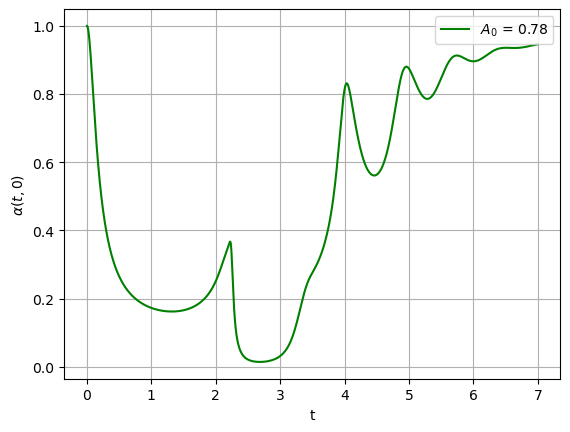

In [144]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin, color = "g", label = f"$A_0$ = {A0}")
#plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

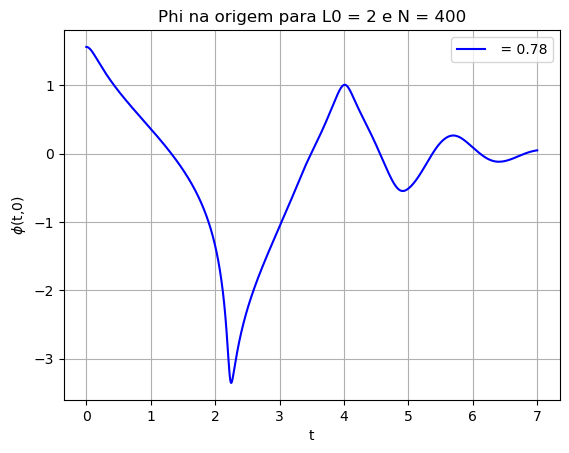

In [141]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.grid()
plt.legend() 

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

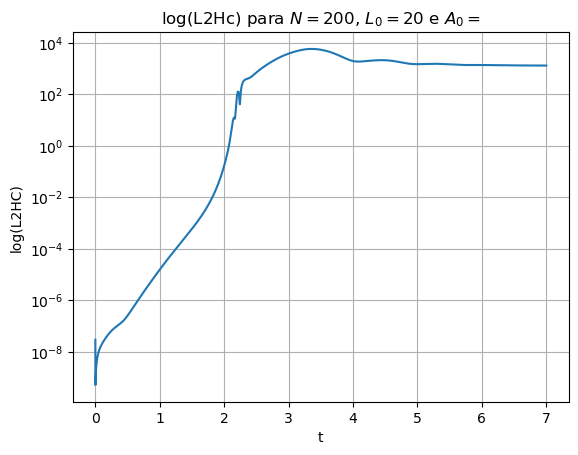

In [142]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

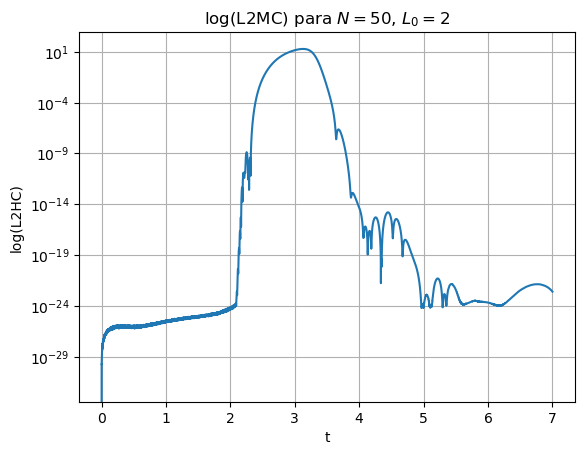

In [143]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [ ]:
#L2HC_50_L02 = max(L2HC)
#L2HC_50_L05 = max(L2HC)
#L2HC_50_L010 = max(L2HC)

#L2HC_100_L02 = max(L2HC)
#L2HC_100_L05 = max(L2HC)
#L2HC_100_L010 = max(L2HC)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L05 = max(L2HC)
#L2HC_150_L010 = max(L2HC)

#L2HC_200_L02 = max(L2HC)
#L2HC_200_L05 = max(L2HC)
#L2HC_200_L010 = max(L2HC)

#L2HC_250_L02 = max(L2HC)
#L2HC_250_L05 = max(L2HC)
#L2HC_250_L010 = max(L2HC)

#L2HC_300_L02 = max(L2MC)
#L2HC_300_L05 = max(L2MC)
#L2HC_300_L010 = max(L2MC)

In [ ]:
print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010,'L2HC_100_L02 =',L2HC_100_L02,'L2HC_100_L05 =', L2HC_100_L05, 'L2HC_100_L010 =',L2HC_100_L010,'L2HC_150_L02 =',L2HC_150_L02,'L2HC_150_L05 =', L2HC_150_L05, 'L2HC_150_L010 =',L2HC_150_L010,'L2HC_200_L02 =',L2HC_200_L02,'L2HC_200_L05 =', L2HC_200_L05, 'L2HC_200_L010 =',L2HC_200_L010, 'L2HC_250_L02 =',L2HC_250_L02,'L2HC_250_L05 =', L2HC_250_L05, 'L2HC_250_L010 =',L2HC_250_L010, sep = '\n')

In [ ]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

#L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
#L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

#L2MC_300_L02 = max(L2MC)
#L2MC_300_L05 = max(L2MC)
#L2MC_300_L010 = max(L2MC)

In [ ]:
print('L2MC_50_L02 =',L2MC_50_L02,'L2MC_50_L05 =', L2MC_50_L05, 'L2MC_50_L010 =',L2MC_50_L010,'L2MC_100_L02 =',L2MC_100_L02,'L2MC_100_L05 =', L2MC_100_L05, 'L2MC_100_L010 =',L2MC_100_L010,'L2MC_150_L02 =',L2MC_150_L02,'L2MC_150_L05 =', L2MC_150_L05, 'L2MC_150_L010 =',L2MC_150_L010,'L2MC_200_L02 =',L2MC_200_L02,'L2MC_200_L05 =', L2MC_200_L05, 'L2MC_200_L010 =',L2MC_200_L010, 'L2MC_250_L02 =',L2MC_250_L02,'L2MC_250_L05 =', L2MC_250_L05, 'L2MC_250_L010 =',L2MC_250_L010, sep = '\n')

In [ ]:


L2HC_50_L02 =0.01816391546619686
L2HC_50_L05 =0.0002546176908516956
L2HC_50_L010 =0.002733059112102552
L2HC_100_L02 =0.0027662912019201643
L2HC_100_L05 =1.3791713620705118e-06
L2HC_100_L010 =1.4069193497023997e-05
L2HC_150_L02 =0.0004488248226698636
L2HC_150_L05 =9.503741887713358e-09
L2HC_150_L010 =3.058868117659927e-08
L2HC_200_L02 =1.8196716483457423e-05
L2HC_200_L05 =4.542907764384823e-09
L2HC_200_L010 =3.349944877536477e-11
L2HC_250_L02 =8.89094083876591e-07
L2HC_250_L05 =2.6213587923518953e-09
L2HC_250_L010 =2.2760809719282817e-11

L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05, L2HC_200_L05, L2HC_250_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010, L2HC_200_L010, L2HC_250_L010]

Ns = [50,100,150,200,250]

plt.plot(Ns, L2HC_L02, '-b^', label = "L0 = 2", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L05, '-rs',label = "L0 = 5", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L010, '-ko',label = "L0 = 10", markersize = 10, markerfacecolor='none')
plt.xticks(Ns)
plt.tick_params(axis='both', which='both', labelsize=12)  # Ajusta o tamanho dos ticks em ambos os eixos
plt.xlabel('N', fontsize = 14)
plt.ylabel('$L_2(HC)max$', fontsize = 14)
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.legend()
plt.show()

In [ ]:
# Plot 3D from scalar field at t = constant:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

     
#ax1.plot(x, y)
#surf = ax2.plot_surface(xn, yn, zn, rstride = 1, cmap = 'viridis', edgecolor = 'none')
#fig.colorbar(surf, ax = ax2, shrink = 0.5, aspect = 5)  # adiciona barra de cores para a superfície 3D
#ax1.view_init(elev = 30, azim = 30)  # ajusta a perspectiva
#ax2.view_init(elev = 30, azim = 30)
#ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
phi_set[49999]

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
if A0 > 0.0819:
    anim.save("animation_colapse.mp4")
else:
    anim.save("animation_dispersion.mp4")
    
        